In [256]:
#Import several libraries for computation and data visualization
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve,roc_auc_score, auc
from sklearn.metrics import precision_score, recall_score, f1_score


In [192]:
#Access and read the dataset.csv file

file_path = "./dataset.csv"
df_mobile_data = pd.read_csv(file_path)
print(f"Length of dataset: {df_mobile_data.shape[0]} rows x {df_mobile_data.shape[1]} columns")


Length of dataset: 4000 rows x 24 columns


In [193]:
df_mobile_data.head()

,battery_mAh,screen_height_cm,screen_width_px,weight_g,internal_memory_GB,color_variety,has_4g,screen_height_px,has_wifi,talk_time_hr,...,year_release,ram_MB,front_camera_mp,cpu_cores,has_bluetooth,has_3g,cpu_speed_GHz,has_touchscreen,has_dual_sim,price_range
0,842,9,756,188,7,5,0,20,1,19,...,2016,2549,1,2,0,0,2.2,0,0,1
1,1021,17,1988,136,53,2,1,905,0,7,...,2019,2631,0,3,1,1,0.5,1,1,2
2,563,11,1716,145,41,1,1,1263,0,9,...,2016,2603,2,5,1,1,0.5,1,1,2
3,615,16,1786,131,10,2,0,1216,0,11,...,2016,2769,0,6,1,1,2.5,0,0,2
4,1821,8,1212,141,44,5,1,1208,0,15,...,2020,1411,13,2,1,1,1.2,1,0,1


In [194]:
df_mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   battery_mAh         4000 non-null   int64  
 1   screen_height_cm    4000 non-null   int64  
 2   screen_width_px     4000 non-null   int64  
 3   weight_g            4000 non-null   int64  
 4   internal_memory_GB  4000 non-null   int64  
 5   color_variety       4000 non-null   int64  
 6   has_4g              4000 non-null   int64  
 7   screen_height_px    4000 non-null   int64  
 8   has_wifi            4000 non-null   int64  
 9   talk_time_hr        4000 non-null   int64  
 10  primary_camera_mp   4000 non-null   int64  
 11  brand_popularity    4000 non-null   int64  
 12  thickness_cm        4000 non-null   float64
 13  screen_width_cm     4000 non-null   int64  
 14  year_release        4000 non-null   int64  
 15  ram_MB              4000 non-null   int64  
 16  front_

In [195]:
df_mobile_data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_mAh,4000.0,1238.51850,439.363262,501.0,851.75,1226.0,1615.25,1998.0
screen_height_cm,4000.0,12.30650,4.212718,5.0,9.00,12.0,16.00,19.0
screen_width_px,4000.0,1251.51550,432.145405,500.0,874.75,1247.0,1633.00,1998.0
weight_g,4000.0,140.24900,35.395229,80.0,109.00,141.0,170.00,200.0
internal_memory_GB,4000.0,32.04650,18.143446,2.0,16.00,32.0,48.00,64.0
color_variety,4000.0,3.01425,1.433548,1.0,2.00,3.0,4.00,5.0
has_4g,4000.0,0.52150,0.499600,0.0,0.00,1.0,1.00,1.0
screen_height_px,4000.0,645.10800,443.725321,0.0,282.75,564.0,947.25,1960.0
has_wifi,4000.0,0.50700,0.500014,0.0,0.00,1.0,1.00,1.0
talk_time_hr,4000.0,11.01100,5.463272,2.0,6.00,11.0,16.00,20.0


In [196]:
def show_value_counts(df_mobile_data, col_name=None):
    if col_name:
        if col_name in df_mobile_data.columns:
            print(f"\n Columns: {col_name}")
            print(df_mobile_data[col_name].value_counts().sort_index())
            print("-" * 50)
        else:
            print(f"⚠️ Column '{col_name}' not found in dataset.")
    else:
        for col in df_mobile_data.columns:
            print(f"\n📊 Column: {col}")
            print(df_mobile_data[col].value_counts().sort_index())
            print("-" * 50)

In [197]:
show_value_counts(df_mobile_data)


📊 Column: battery_mAh
battery_mAh
501      4
502      4
503      6
504     10
506      2
        ..
1994     6
1995     4
1996     4
1997     2
1998     2
Name: count, Length: 1094, dtype: int64
--------------------------------------------------

📊 Column: screen_height_cm
screen_height_cm
5     194
6     228
7     302
8     234
9     248
10    250
11    252
12    314
13    262
14    286
15    270
16    286
17    386
18    240
19    248
Name: count, dtype: int64
--------------------------------------------------

📊 Column: screen_width_px
screen_width_px
500     4
501     4
503     2
506     2
507     8
       ..
1994    4
1995    6
1996    2
1997    2
1998    2
Name: count, Length: 1109, dtype: int64
--------------------------------------------------

📊 Column: weight_g
weight_g
80     42
81     26
82     30
83     38
84     34
       ..
196    40
197    38
198    50
199    52
200    38
Name: count, Length: 121, dtype: int64
--------------------------------------------------

📊 Colum

In [198]:
#Checking how many observations having screen_height_px value as 0
print(df_mobile_data['screen_height_px'].value_counts().sort_index())
#OR
    #print(df_mobile_data[df_mobile_data['screen_height_px']==0].shape[0])

screen_height_px
0       4
1       2
2       2
3       4
4       6
       ..
1901    2
1914    2
1920    2
1949    2
1960    2
Name: count, Length: 1137, dtype: int64


In [199]:
#Checking how many observations having screen_width_cm value as 0
print(df_mobile_data['screen_width_cm'].value_counts().sort_index())
#OR
    #print(df_mobile_data[df_mobile_data['screen_width_cm']==0].shape[0])

screen_width_cm
0     360
1     420
2     312
3     398
4     364
5     322
6     260
7     264
8     250
9     194
10    214
11    168
12    136
13     98
14     66
15     62
16     58
17     38
18     16
Name: count, dtype: int64


In [200]:
#As there are only 4 observations having screen_height_px = 0. So we will drop it
df_mobile_data = df_mobile_data[df_mobile_data['screen_height_px']!=0]

In [201]:
print(df_mobile_data[df_mobile_data['screen_height_px']==0].shape[0])

0


In [202]:
print(df_mobile_data[df_mobile_data['screen_width_cm']==0].shape[0])

358


In [203]:
#Đối với value ở columns['screen_width_cm'] có min thấp nhất là 0. Tuy nhiên đối với chiều rộng của màn hình thì mặc định của không thể là 0 được. Vậy ta dùng Nearest Neighbors Imputations (KNNImputer) để điền những missing value.
    #- Before using KNNImputer we need to replace 0 with NAN values. So that it will work

In [204]:
# Replacing 0 with NAN so that we can implement KNNImputer
df_mobile_data['screen_width_cm'] = df_mobile_data['screen_width_cm'].replace(0, np.nan)

In [205]:
#Checking columns['screen_width_cm'] having value NAN
df_mobile_data['screen_width_cm'].isna().sum()

np.int64(358)

In [206]:
# Import KNN imputer from sklearn
from sklearn.impute import KNNImputer
impute_knn_value = KNNImputer(n_neighbors = 2)
df_mobile_data = pd.DataFrame(impute_knn_value.fit_transform(df_mobile_data), columns=df_mobile_data.columns)

In [207]:
#Checking shape
df_mobile_data.shape

(3996, 24)

In [208]:
#Checking how many observations having 'screen_width_cm' value as 0
df_mobile_data[df_mobile_data['screen_width_cm']==0]

,battery_mAh,screen_height_cm,screen_width_px,weight_g,internal_memory_GB,color_variety,has_4g,screen_height_px,has_wifi,talk_time_hr,...,year_release,ram_MB,front_camera_mp,cpu_cores,has_bluetooth,has_3g,cpu_speed_GHz,has_touchscreen,has_dual_sim,price_range


In [209]:
#Cheking the datatypes, non-null values after we were using KNNImputer for values
df_mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3996 entries, 0 to 3995
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   battery_mAh         3996 non-null   float64
 1   screen_height_cm    3996 non-null   float64
 2   screen_width_px     3996 non-null   float64
 3   weight_g            3996 non-null   float64
 4   internal_memory_GB  3996 non-null   float64
 5   color_variety       3996 non-null   float64
 6   has_4g              3996 non-null   float64
 7   screen_height_px    3996 non-null   float64
 8   has_wifi            3996 non-null   float64
 9   talk_time_hr        3996 non-null   float64
 10  primary_camera_mp   3996 non-null   float64
 11  brand_popularity    3996 non-null   float64
 12  thickness_cm        3996 non-null   float64
 13  screen_width_cm     3996 non-null   float64
 14  year_release        3996 non-null   float64
 15  ram_MB              3996 non-null   float64
 16  front_

In [210]:
#Checking Null values
df_mobile_data.isnull().sum()

battery_mAh           0
screen_height_cm      0
screen_width_px       0
weight_g              0
internal_memory_GB    0
color_variety         0
has_4g                0
screen_height_px      0
has_wifi              0
talk_time_hr          0
primary_camera_mp     0
brand_popularity      0
thickness_cm          0
screen_width_cm       0
year_release          0
ram_MB                0
front_camera_mp       0
cpu_cores             0
has_bluetooth         0
has_3g                0
cpu_speed_GHz         0
has_touchscreen       0
has_dual_sim          0
price_range           0
dtype: int64

Text(0.5, 1.0, 'Visualising Missing Values')

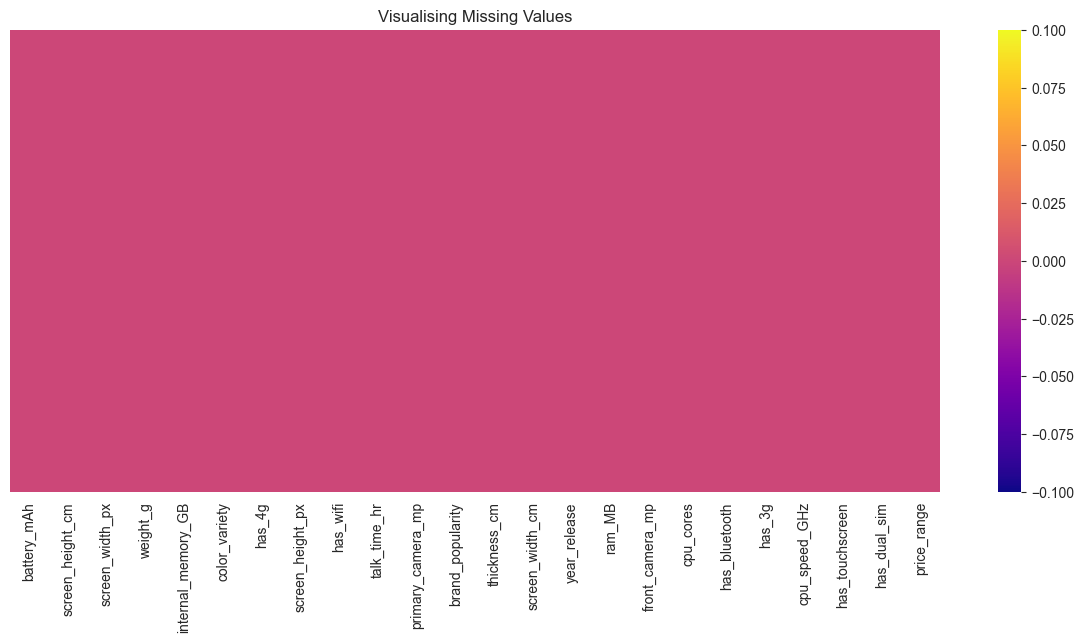

In [211]:
#Visualising Null values using heatmap

plt.figure(figsize=(15, 6))
sns.heatmap(df_mobile_data.isnull(), cmap="plasma", yticklabels=False)
plt.title("Visualising Missing Values")


In [212]:
#Checking Duplicated values in data set

df_mobile_data.duplicated().sum()

np.int64(7)

In [213]:
duplicates = df_mobile_data[df_mobile_data.duplicated(keep=False)]
print(duplicates)

      battery_mAh  screen_height_cm  screen_width_px  weight_g  \
182        1082.0               6.0           1191.0     198.0   
203         671.0               6.0           1182.0     105.0   
228        1578.0              19.0           1226.0     138.0   
249        1617.0               9.0           1038.0     105.0   
374        1334.0              10.0           1974.0     115.0   
626        1620.0               6.0           1033.0     185.0   
1851        648.0              10.0           1811.0     195.0   
2180       1082.0               6.0           1191.0     198.0   
2201        671.0               6.0           1182.0     105.0   
2226       1578.0              19.0           1226.0     138.0   
2247       1617.0               9.0           1038.0     105.0   
2372       1334.0              10.0           1974.0     115.0   
2624       1620.0               6.0           1033.0     185.0   
3849        648.0              10.0           1811.0     195.0   

      int

In [214]:
#Checking another duplicated rows in dataset
if not duplicates.empty:
    print(duplicates.iloc[:2])

     battery_mAh  screen_height_cm  screen_width_px  weight_g  \
182       1082.0               6.0           1191.0     198.0   
203        671.0               6.0           1182.0     105.0   

     internal_memory_GB  color_variety  has_4g  screen_height_px  has_wifi  \
182                38.0            3.0     0.0             986.0       1.0   
203                30.0            1.0     0.0             852.0       0.0   

     talk_time_hr  ...  year_release  ram_MB  front_camera_mp  cpu_cores  \
182          17.0  ...        2019.0  2337.0              0.0        8.0   
203          15.0  ...        2023.0  2504.0             10.0        7.0   

     has_bluetooth  has_3g  cpu_speed_GHz  has_touchscreen  has_dual_sim  \
182            0.0     0.0            0.8              1.0           0.0   
203            0.0     1.0            0.9              0.0           1.0   

     price_range  
182          2.0  
203          2.0  

[2 rows x 24 columns]


In [216]:
#Create a function to detect and remove duplicate rows
def detect_and_remove_duplicates(df_mobile_data):
    print(f" Checking duplicate values in dataframe")
    records_before = len(df_mobile_data)
    records_duplicated = df_mobile_data.duplicated().sum()

    print(f"Number of records before: {records_before}")
    print(f"Number of records duplicated: {records_duplicated}")


    if records_duplicated > 0:
        print(f"The first duplicate record : ")
        print(df_mobile_data.iloc[:2])

        df_clean = df_mobile_data.drop_duplicates(keep='first')
        records_after = len(df_clean)
        print(f"Removed {records_before - records_after} duplicate records")
        print(f"Number of records after: {records_after}")
        return df_clean

detect_and_remove_duplicates(df_mobile_data)

 Checking duplicate values in dataframe
Number of records before: 3996
Number of records duplicated: 7
The first duplicate record : 
   battery_mAh  screen_height_cm  screen_width_px  weight_g  \
0        842.0               9.0            756.0     188.0   
1       1021.0              17.0           1988.0     136.0   

   internal_memory_GB  color_variety  has_4g  screen_height_px  has_wifi  \
0                 7.0            5.0     0.0              20.0       1.0   
1                53.0            2.0     1.0             905.0       0.0   

   talk_time_hr  ...  year_release  ram_MB  front_camera_mp  cpu_cores  \
0          19.0  ...        2016.0  2549.0              1.0        2.0   
1           7.0  ...        2019.0  2631.0              0.0        3.0   

   has_bluetooth  has_3g  cpu_speed_GHz  has_touchscreen  has_dual_sim  \
0            0.0     0.0            2.2              0.0           0.0   
1            1.0     1.0            0.5              1.0           1.0   

  

,battery_mAh,screen_height_cm,screen_width_px,weight_g,internal_memory_GB,color_variety,has_4g,screen_height_px,has_wifi,talk_time_hr,...,year_release,ram_MB,front_camera_mp,cpu_cores,has_bluetooth,has_3g,cpu_speed_GHz,has_touchscreen,has_dual_sim,price_range
0,842.0,9.0,756.0,188.0,7.0,5.0,0.0,20.0,1.0,19.0,...,2016.0,2549.0,1.0,2.0,0.0,0.0,2.2,0.0,0.0,1.0
1,1021.0,17.0,1988.0,136.0,53.0,2.0,1.0,905.0,0.0,7.0,...,2019.0,2631.0,0.0,3.0,1.0,1.0,0.5,1.0,1.0,2.0
2,563.0,11.0,1716.0,145.0,41.0,1.0,1.0,1263.0,0.0,9.0,...,2016.0,2603.0,2.0,5.0,1.0,1.0,0.5,1.0,1.0,2.0
3,615.0,16.0,1786.0,131.0,10.0,2.0,0.0,1216.0,0.0,11.0,...,2016.0,2769.0,0.0,6.0,1.0,1.0,2.5,0.0,0.0,2.0
4,1821.0,8.0,1212.0,141.0,44.0,5.0,1.0,1208.0,0.0,15.0,...,2020.0,1411.0,13.0,2.0,1.0,1.0,1.2,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,794.0,13.0,1890.0,106.0,2.0,1.0,1.0,1222.0,0.0,19.0,...,2015.0,668.0,0.0,6.0,1.0,1.0,0.5,1.0,1.0,0.0
3992,1965.0,11.0,1965.0,187.0,39.0,5.0,0.0,915.0,1.0,16.0,...,2017.0,2032.0,0.0,4.0,1.0,1.0,2.6,1.0,1.0,2.0
3993,1911.0,9.0,1632.0,108.0,36.0,1.0,1.0,868.0,0.0,5.0,...,2023.0,3057.0,1.0,8.0,0.0,1.0,0.9,1.0,1.0,3.0
3994,1512.0,18.0,670.0,145.0,46.0,2.0,1.0,336.0,1.0,19.0,...,2017.0,869.0,4.0,5.0,0.0,1.0,0.9,1.0,0.0,0.0


In [217]:
                # EDA(Exploratory Data Analysis)
#Lets have look at our Target variable's counts

price_range_values = df_mobile_data['price_range'].value_counts().sort_index()
print(price_range_values)

price_range
0.0    1000
1.0     998
2.0    1000
3.0     998
Name: count, dtype: int64


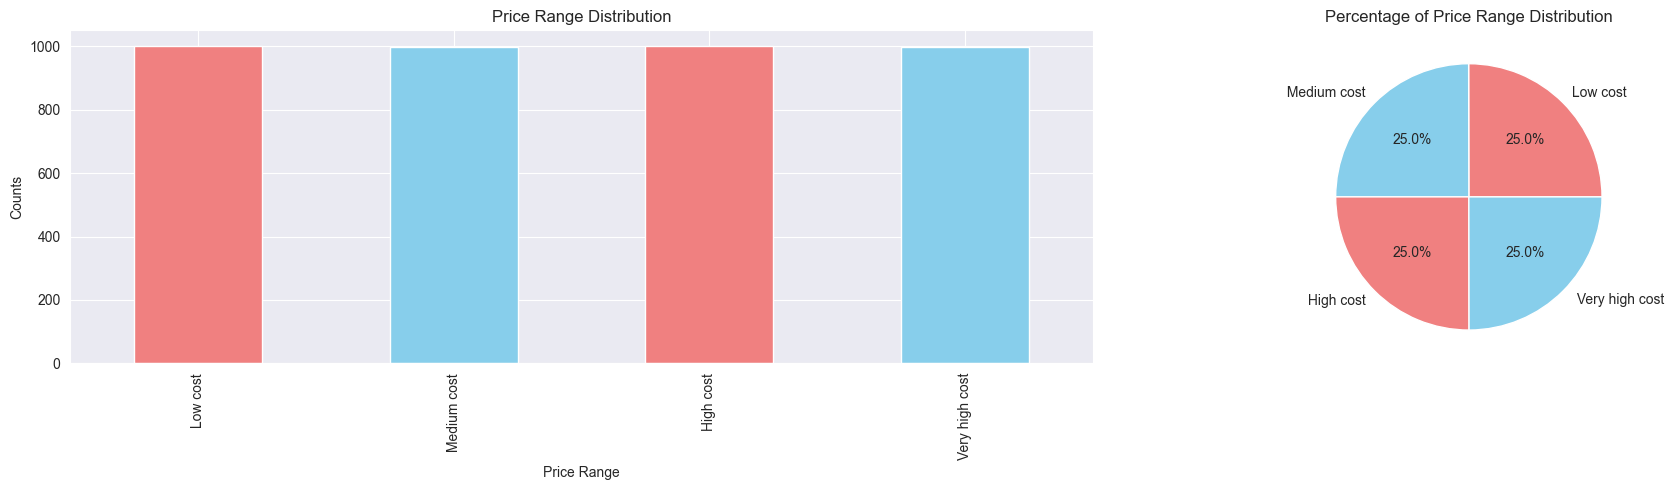

In [219]:
#Visualising variable target in data set
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

price_range_values.plot(kind='bar', ax=ax1, color=['lightcoral', 'skyblue'])
ax1.set_title('Price Range Distribution')
ax1.set_xlabel('Price Range')
ax1.set_xticks(range(len(price_range_values)))
ax1.set_xticklabels(['Low cost', 'Medium cost', 'High cost', 'Very high cost'])
ax1.set_ylabel('Counts')

ax2.pie(price_range_values.values, labels=['Low cost', ' Medium cost', ' High cost', ' Very high cost'],
autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
ax2.set_title('Percentage of Price Range Distribution')
plt.tight_layout()
plt.show()

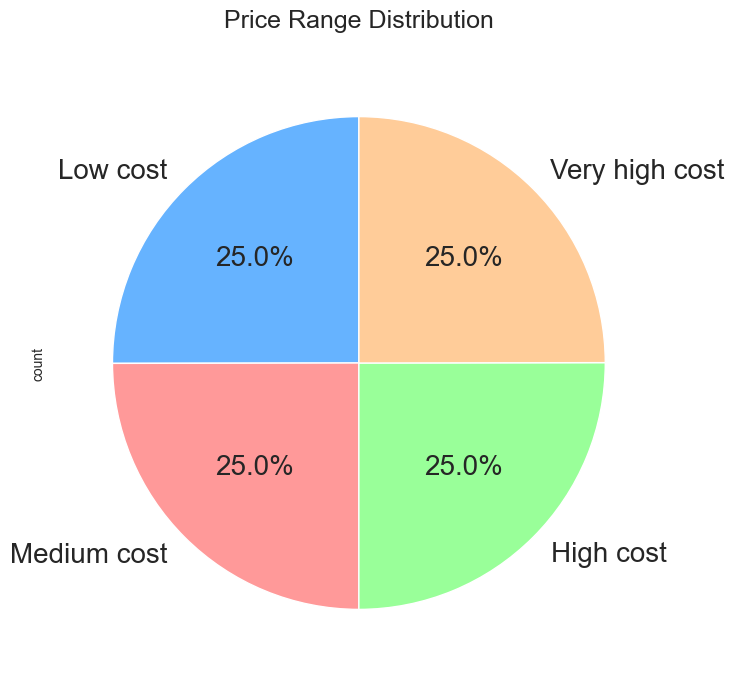

In [220]:
#Visualising the Target variable's class distribution

labels = ["Low cost", "Medium cost", "High cost", "Very high cost"]
plt.figure(figsize=(12, 8))
price_range_values.plot.pie(
    labels=labels,
    explode=[0, 0, 0, 0],
    autopct="%1.1f%%",
    startangle=90,
    fontsize=20,
    colors=['#66b3ff', '#ff9999', '#99ff99', '#ffcc99']
)
plt.title("Price Range Distribution", fontsize=18, pad=20)
plt.show()

<Axes: >

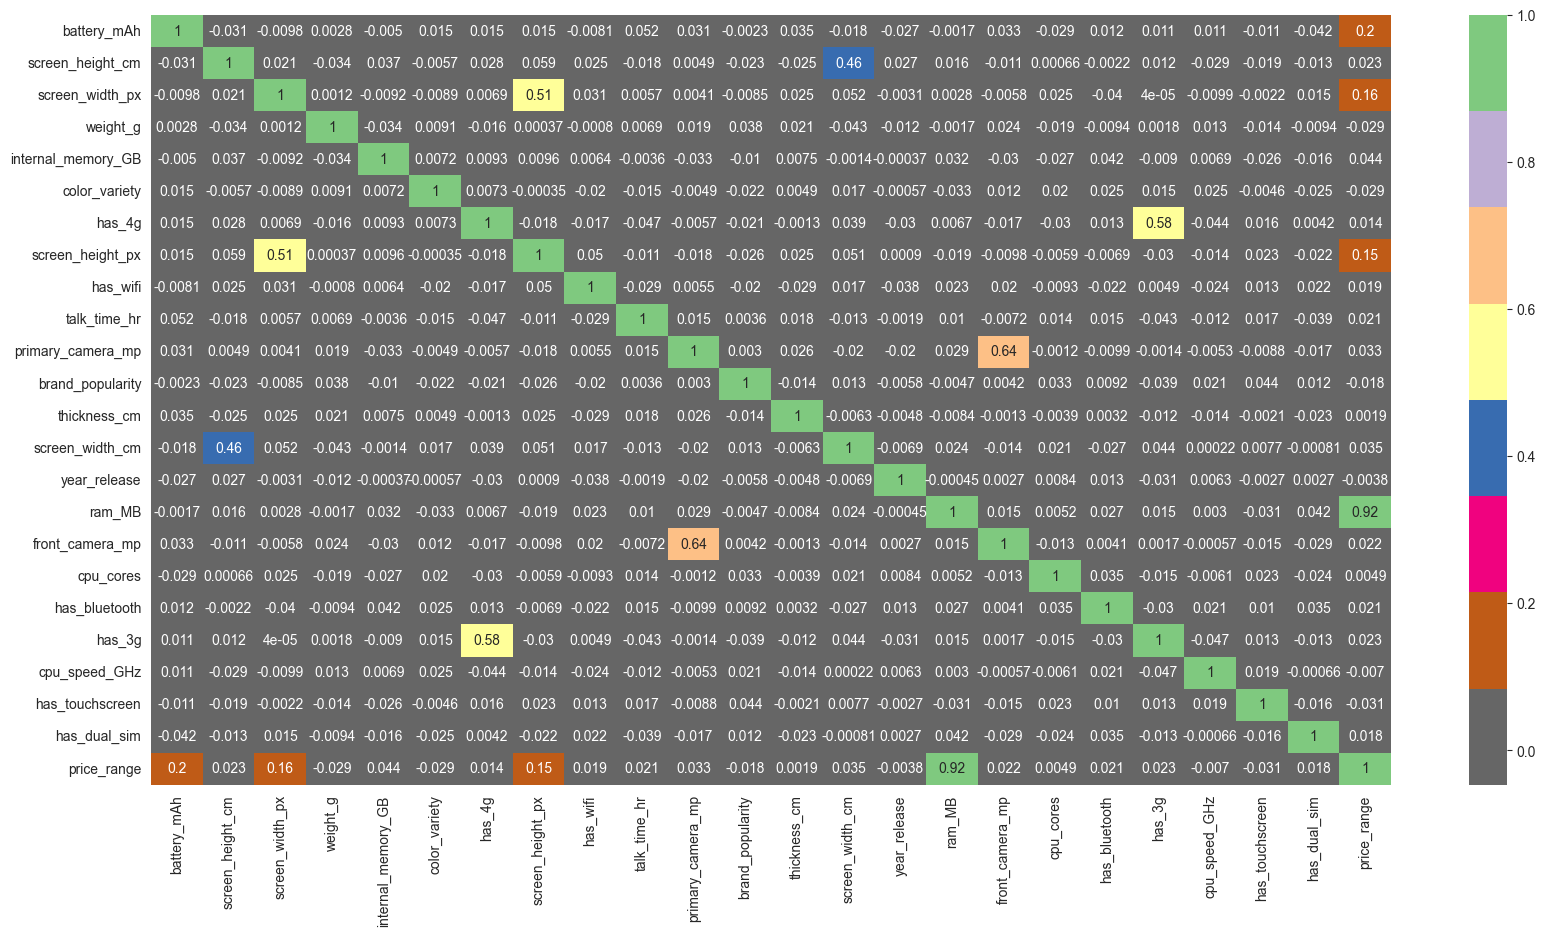

In [221]:
#Correlation of target variable(Output) with other Features

corr= df_mobile_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)

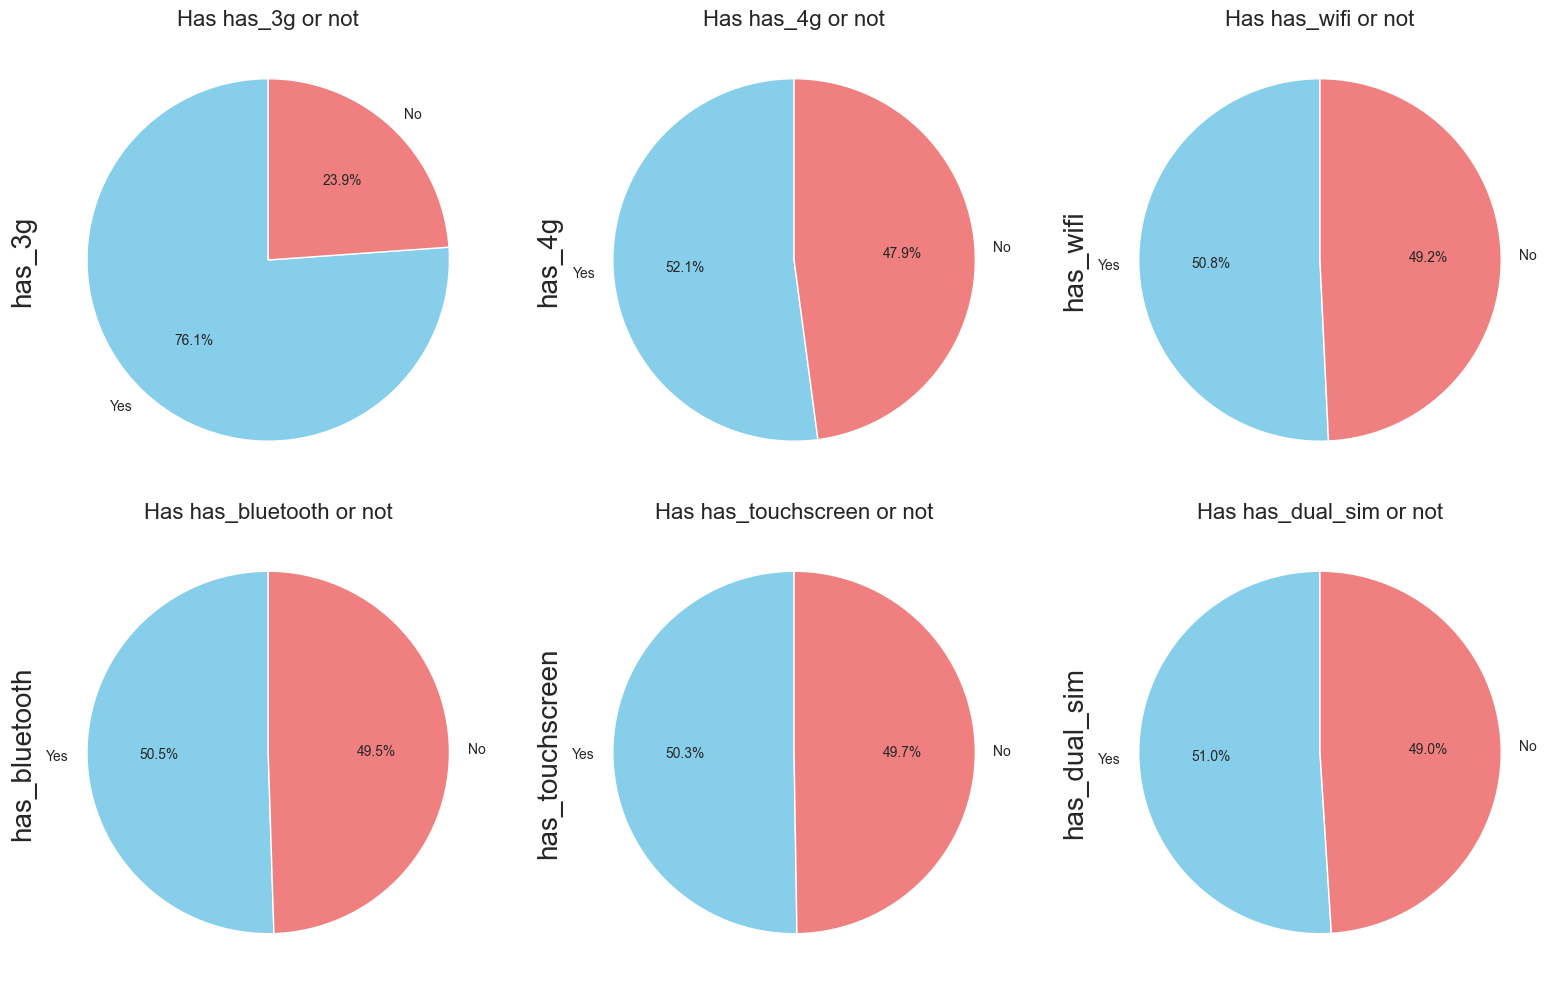

In [223]:
#Univariate Analysis of Categorical columns
# Plotting the piecharts for binary categorical

has_list = ['has_3g', 'has_4g', 'has_wifi', 'has_bluetooth', 'has_touchscreen', 'has_dual_sim']
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for i, feature in enumerate(has_list):
    df_mobile_data[feature].value_counts().plot.pie(
        ax=axes[i],
        autopct='%1.1f%%',
        labels=['Yes', 'No'],
        startangle=90,
        colors=['skyblue', 'lightcoral']
    )
    axes[i].set_title(f'Has {feature} or not', fontsize=16)
    axes[i].set_ylabel(feature, fontsize=20)

if len(has_list) < len(axes):
    for j in range(len(has_list), len(axes)):
        axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#1 mean it has the specifications
#0 means it do not have the specifications
#very few mobiles(23.9%) do not have has_3g



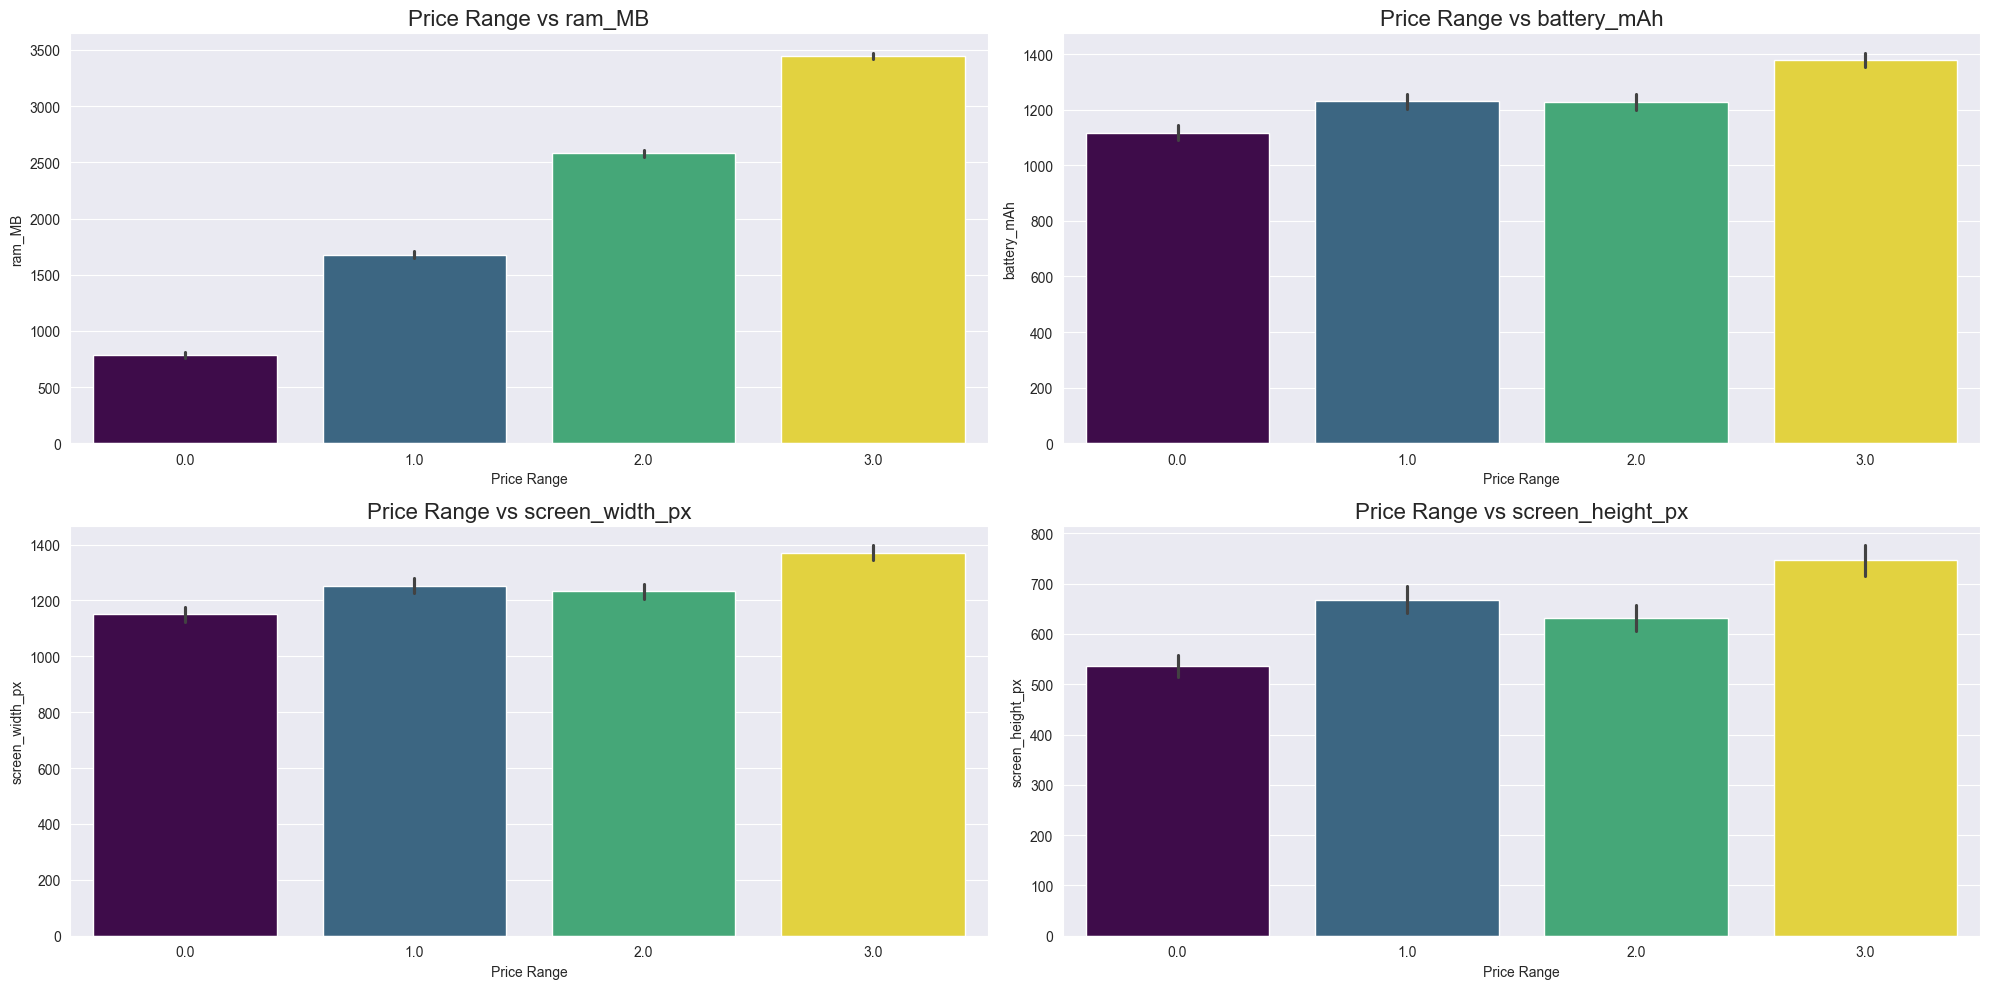

In [224]:
#Relation between ram_MB, Battery_mAh,screen_width_px and screen_height_px

#Plotting price_range vs other features
variables = ['ram_MB', 'battery_mAh', 'screen_width_px', 'screen_height_px']

# Tạo 2 hàng 2 cột subplot
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes = axes.ravel()

# Vẽ barplot cho từng feature
for i, feature in enumerate(variables):
    sns.barplot(
        data=df_mobile_data,
        x='price_range',
        y=feature,
        hue='price_range',
        legend=False,
        palette='viridis',
        ax=axes[i]
    )
    axes[i].set_title(f'Price Range vs {feature}', fontsize=16)
    axes[i].set_xlabel('Price Range')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


#Observations
    #Mobiles having ram_MB > 3000 falls under very high cost category. As ram_MB increases, price range also increases
    #Moblies having battery_mAh power > 1300mAh has very high cost
    #Mobiles with more than 700 pixel screen height and width more than 1300 has very high cost.



In [225]:
#Let's check which numerical feature is driving the price range most
df_mobile_data.columns

Index(['battery_mAh', 'screen_height_cm', 'screen_width_px', 'weight_g',
       'internal_memory_GB', 'color_variety', 'has_4g', 'screen_height_px',
       'has_wifi', 'talk_time_hr', 'primary_camera_mp', 'brand_popularity',
       'thickness_cm', 'screen_width_cm', 'year_release', 'ram_MB',
       'front_camera_mp', 'cpu_cores', 'has_bluetooth', 'has_3g',
       'cpu_speed_GHz', 'has_touchscreen', 'has_dual_sim', 'price_range'],
      dtype='object')

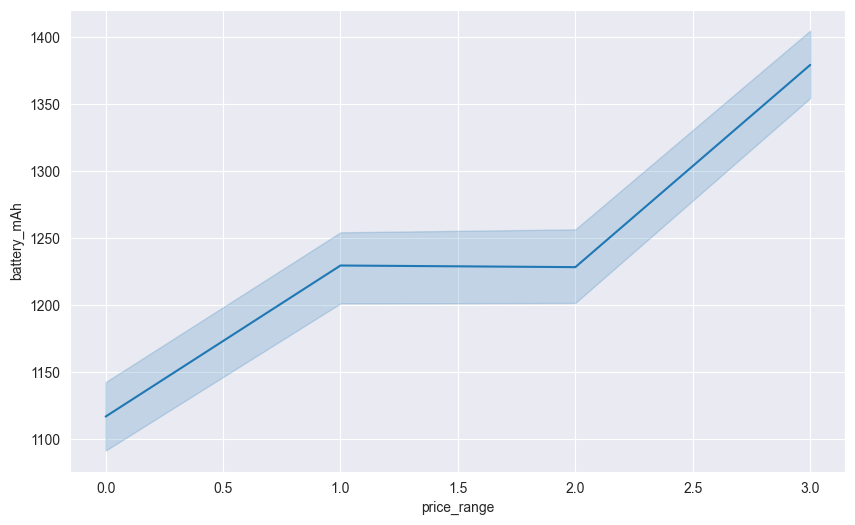

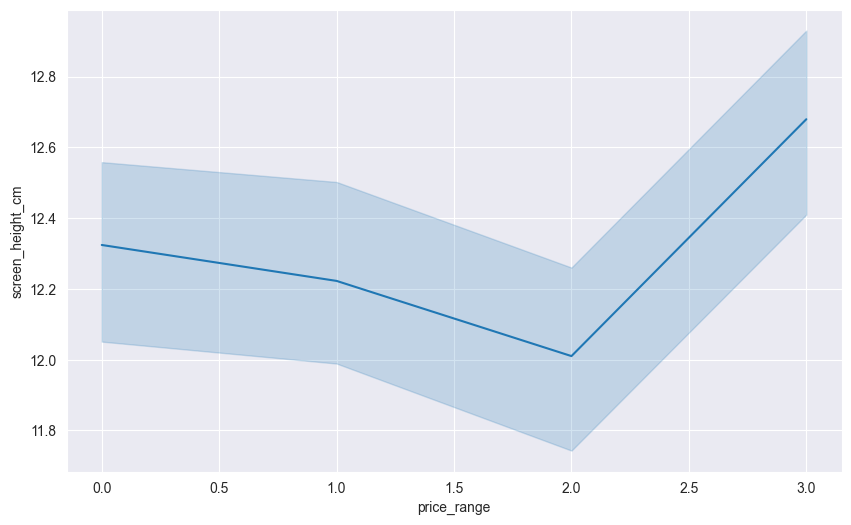

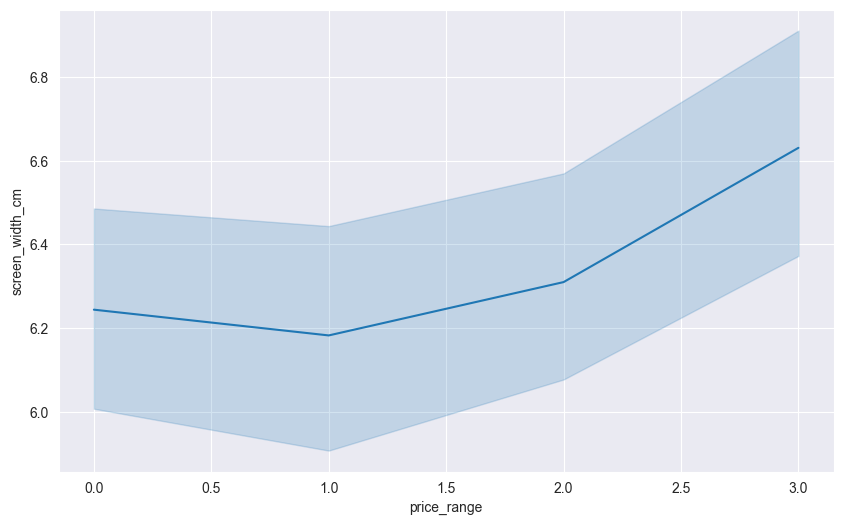

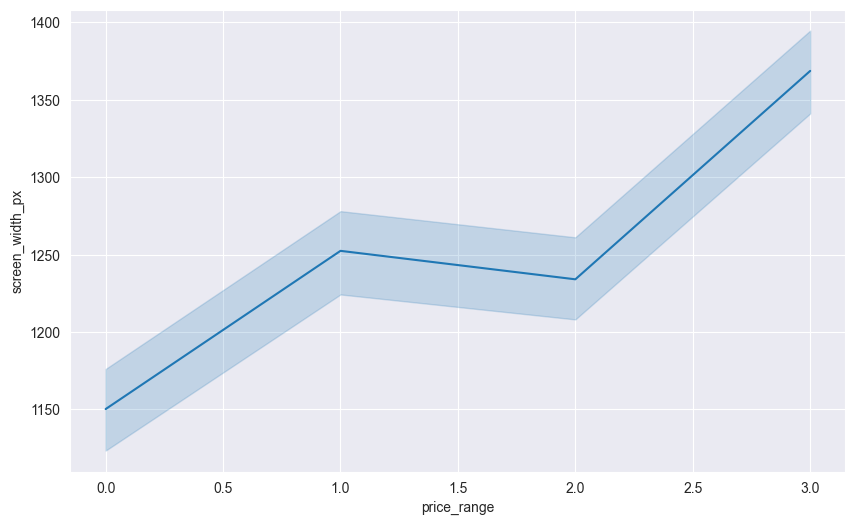

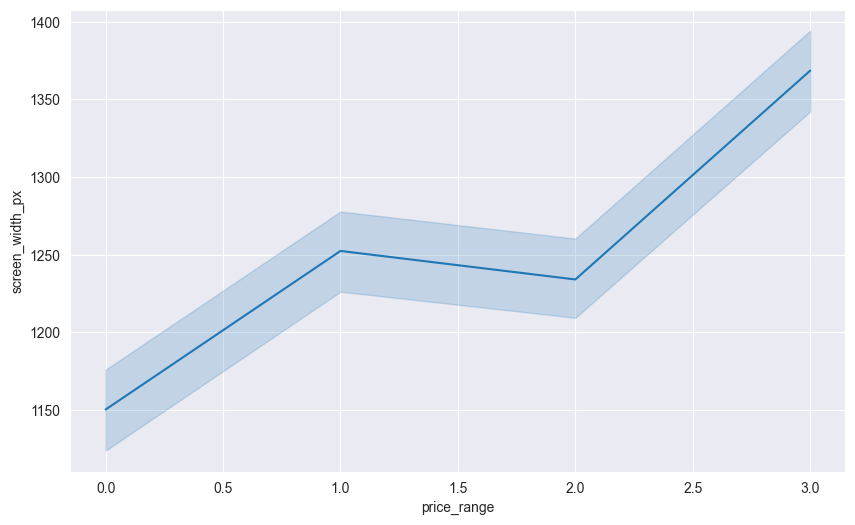

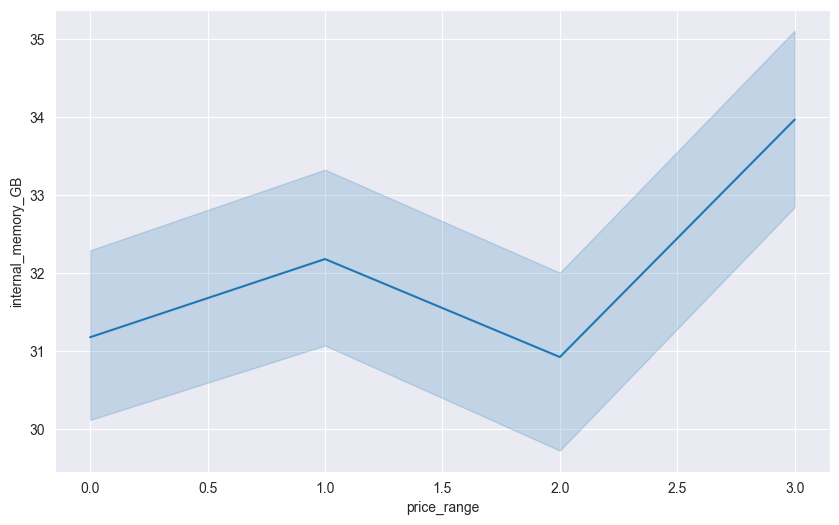

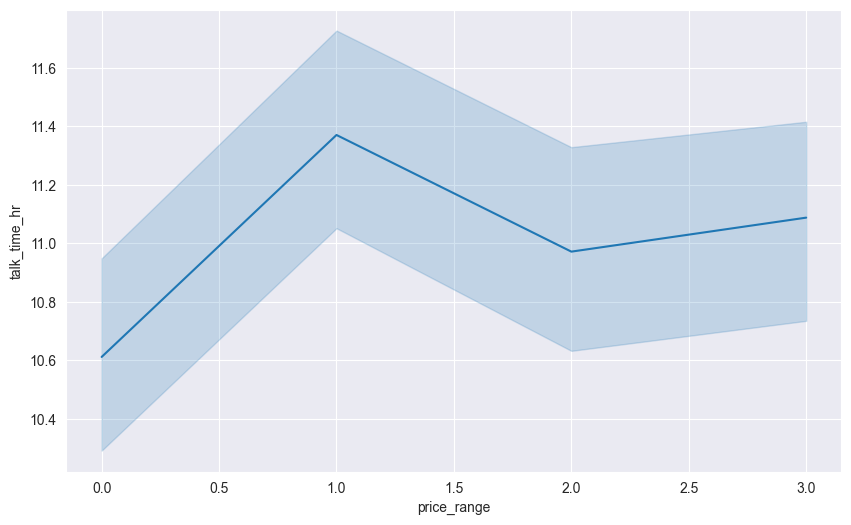

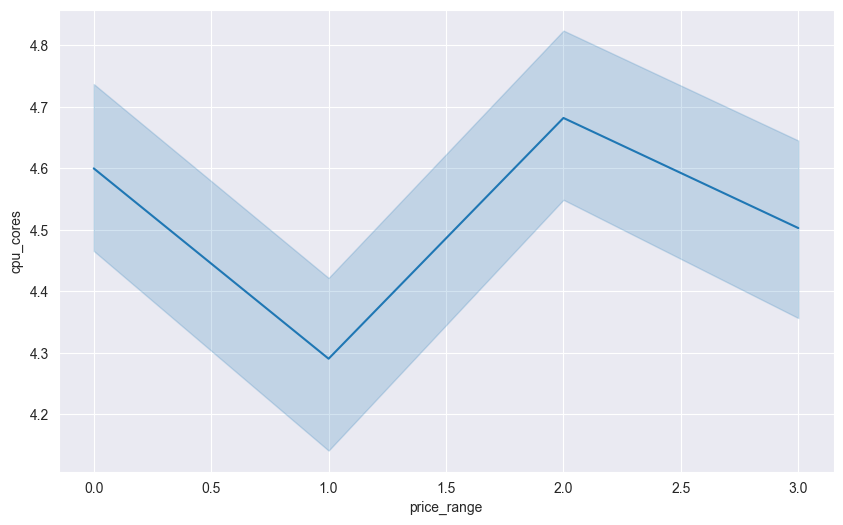

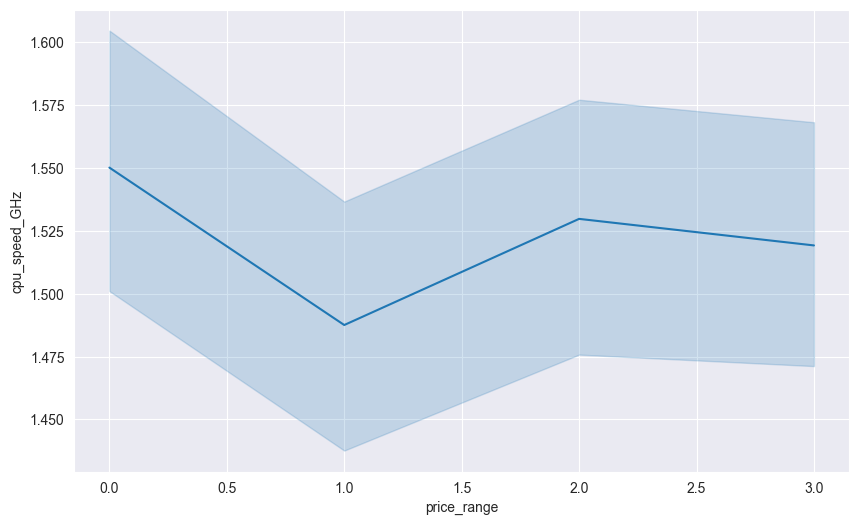

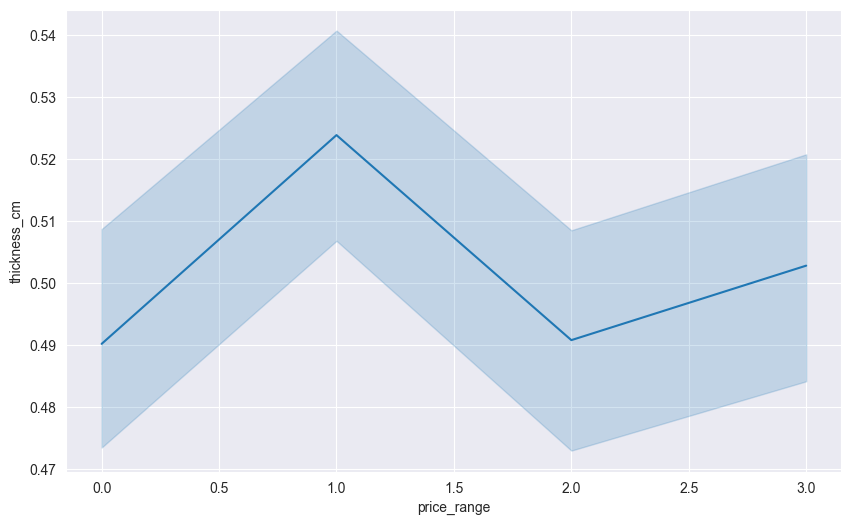

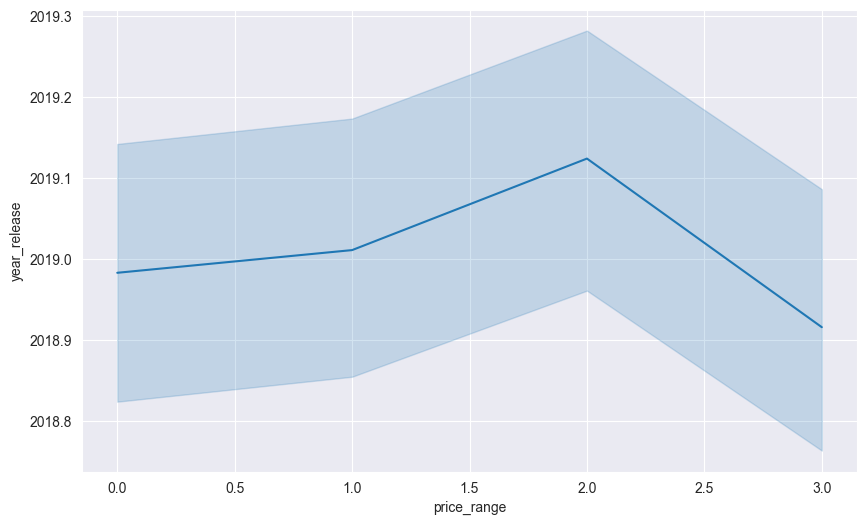

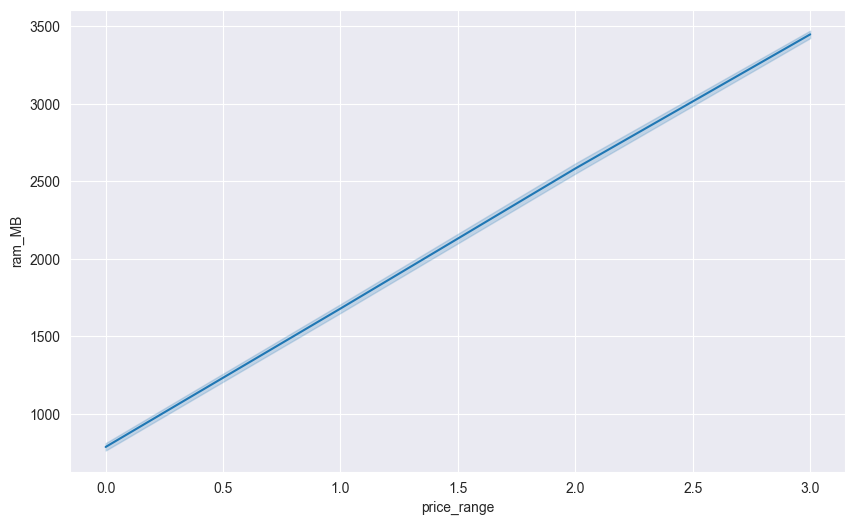

In [226]:
list_1 = ['battery_mAh', 'screen_height_cm', 'screen_width_cm', 'screen_width_px', 'screen_width_px', 'internal_memory_GB', 'talk_time_hr', 'cpu_cores','cpu_speed_GHz','thickness_cm','year_release', 'ram_MB']

for var in list_1:
    plt.figure(figsize=(10, 6))

    sns.lineplot(x = df_mobile_data['price_range'], y = df_mobile_data[var])

#For class 1 and class2 battery power range is almost similar. As battery   power increases price also increases whcih is quite obivious.
#Mobiles in very high price range(Class 3) has less weight compared to      other classes.That means as weight of mobiles decrease price increases.
#Mobiles having max screen height and width falls in very high price        category. We can see in linechart of sc_width and sc_height from        class 2 screen width and hieght starts increasing with price. Similar   case is with px_height and px_width. As resolution of screen            increases the price also increases RAM has clear relationship with      price range we saw that in correlation matrix also.

In [227]:
df_mobile_data.columns

Index(['battery_mAh', 'screen_height_cm', 'screen_width_px', 'weight_g',
       'internal_memory_GB', 'color_variety', 'has_4g', 'screen_height_px',
       'has_wifi', 'talk_time_hr', 'primary_camera_mp', 'brand_popularity',
       'thickness_cm', 'screen_width_cm', 'year_release', 'ram_MB',
       'front_camera_mp', 'cpu_cores', 'has_bluetooth', 'has_3g',
       'cpu_speed_GHz', 'has_touchscreen', 'has_dual_sim', 'price_range'],
      dtype='object')

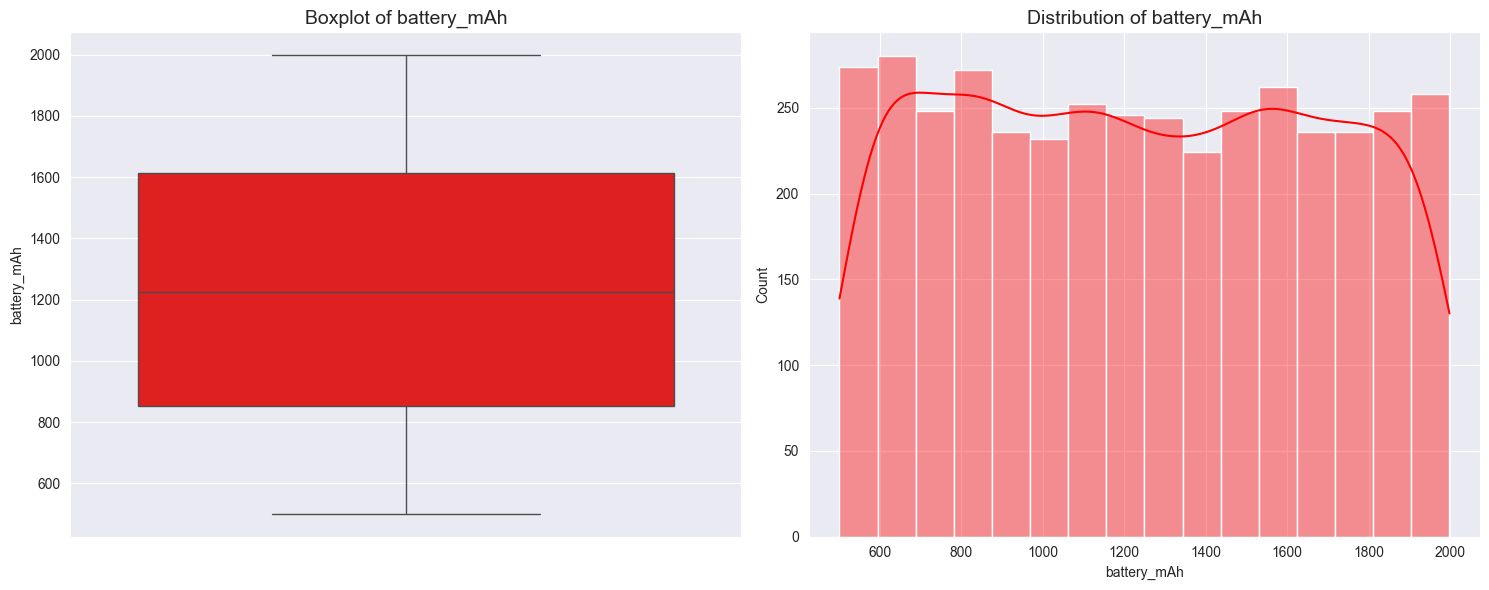

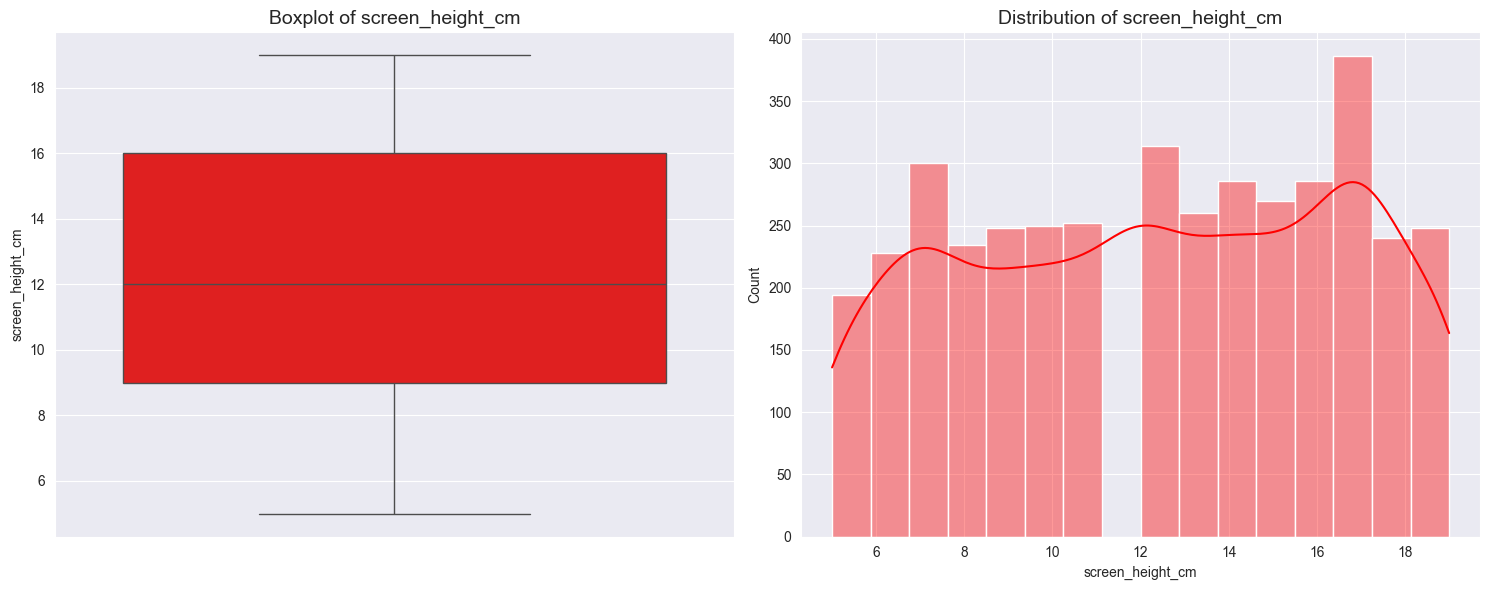

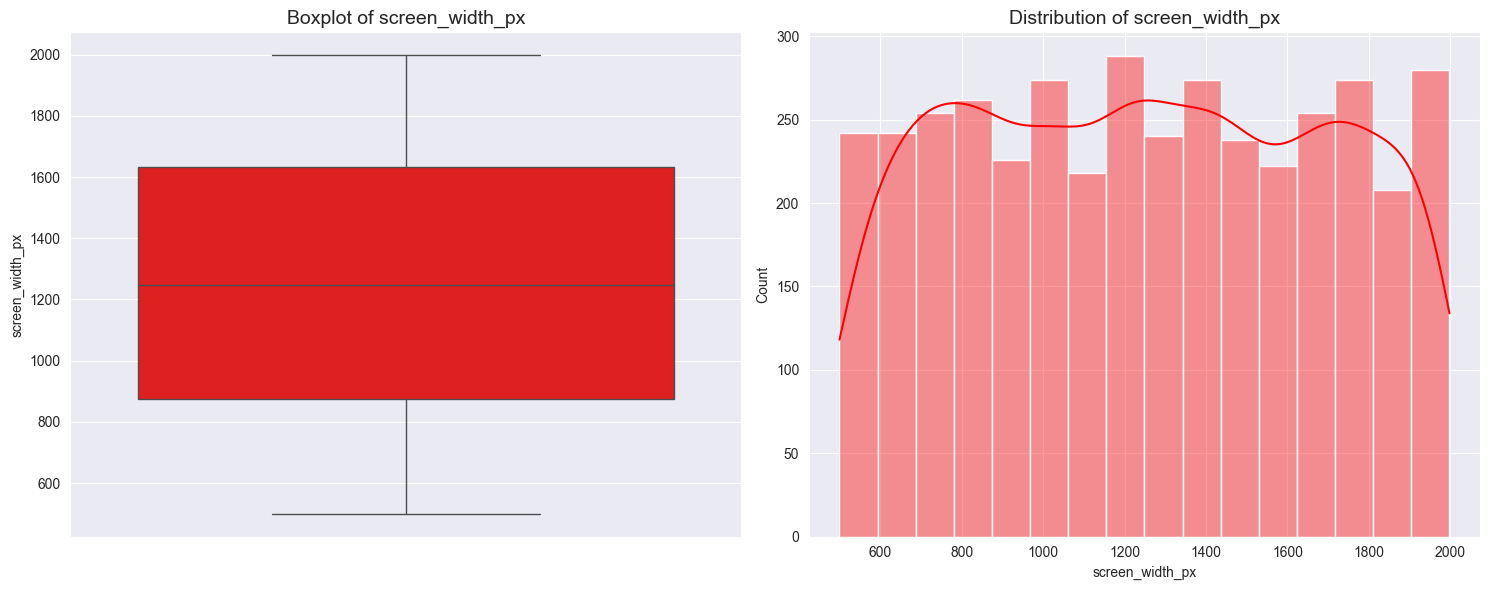

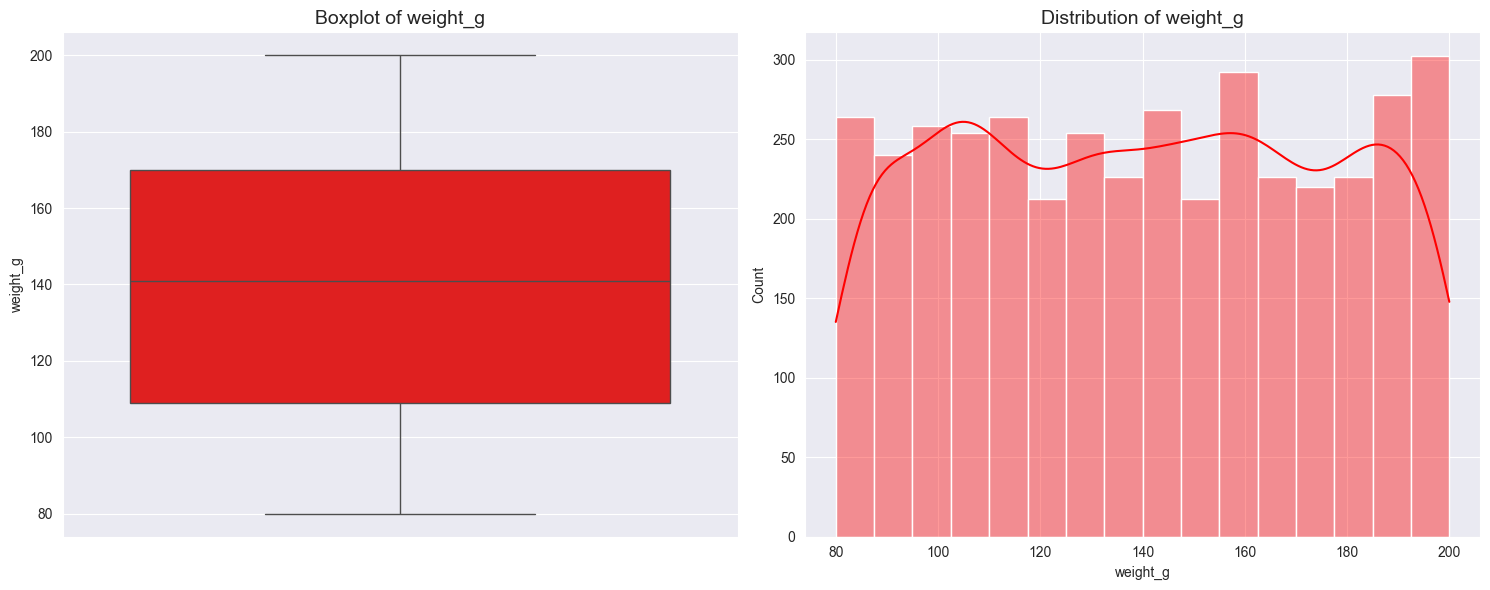

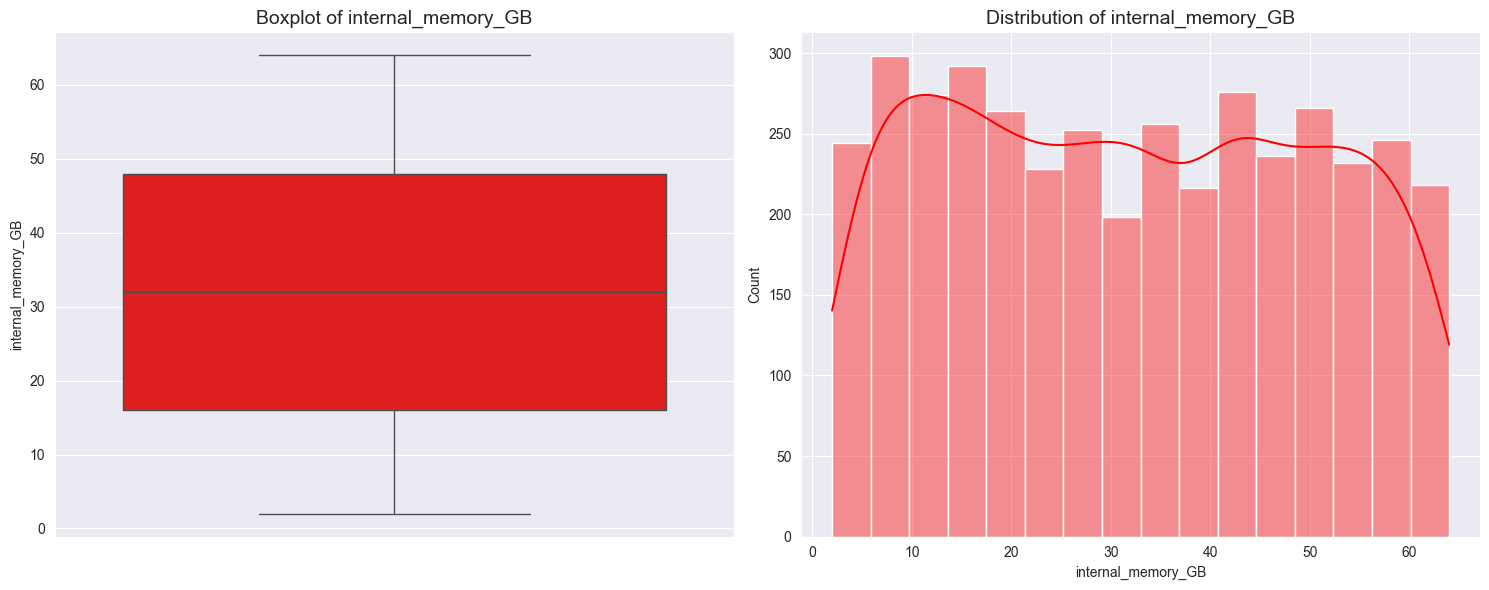

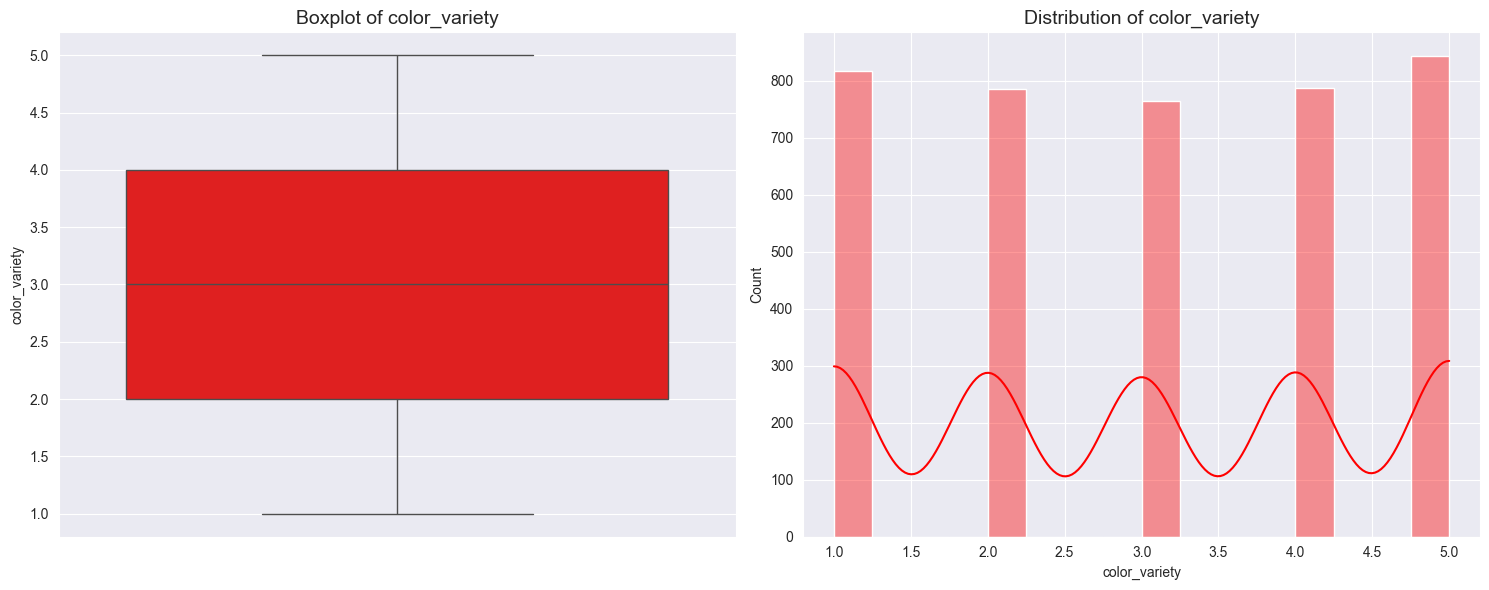

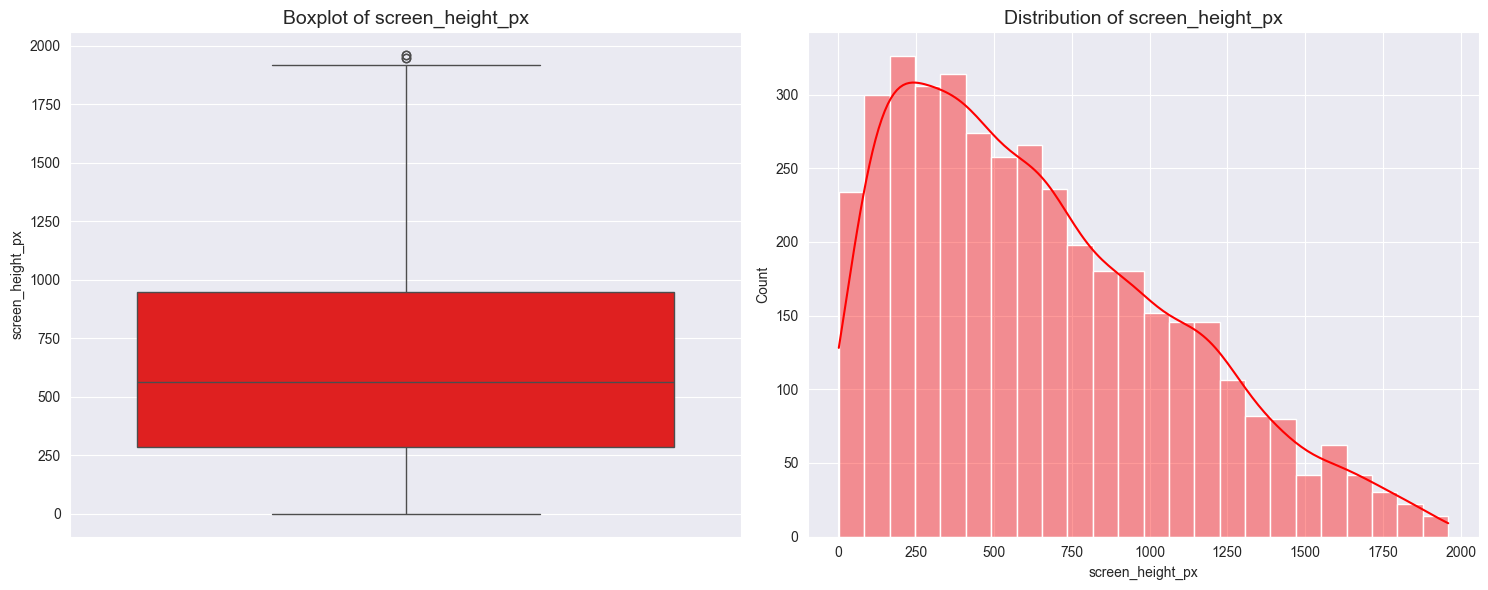

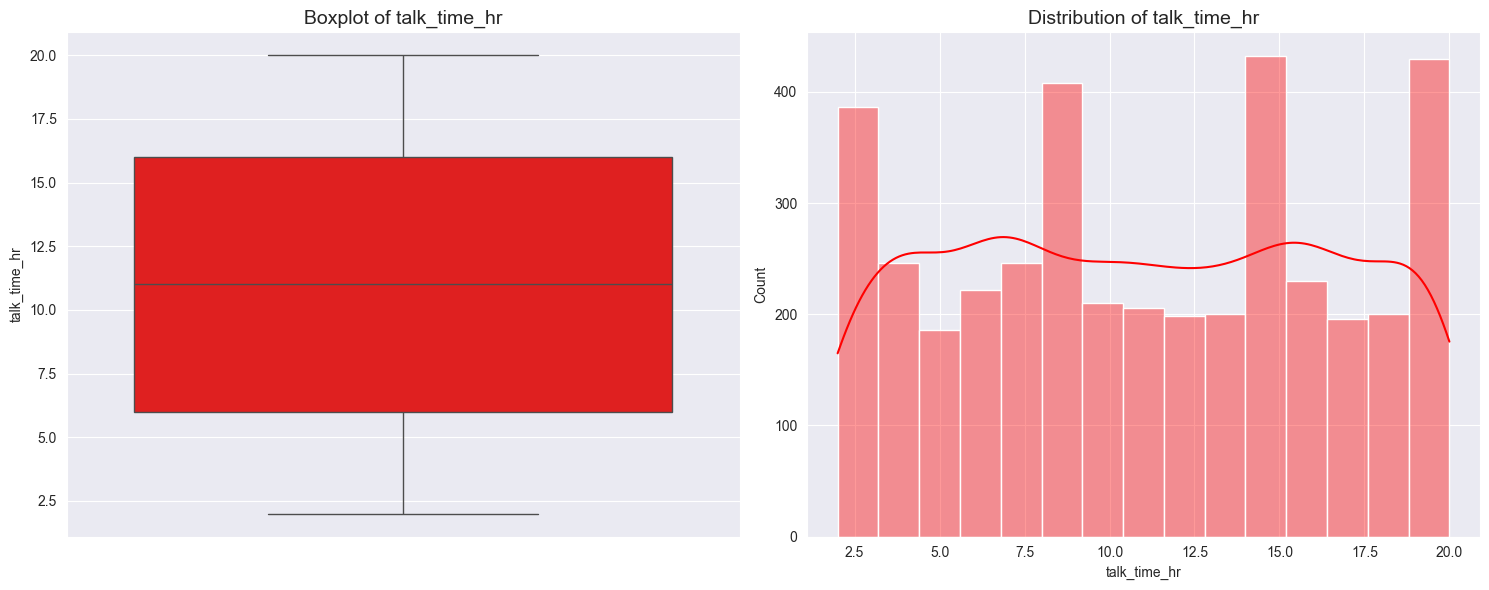

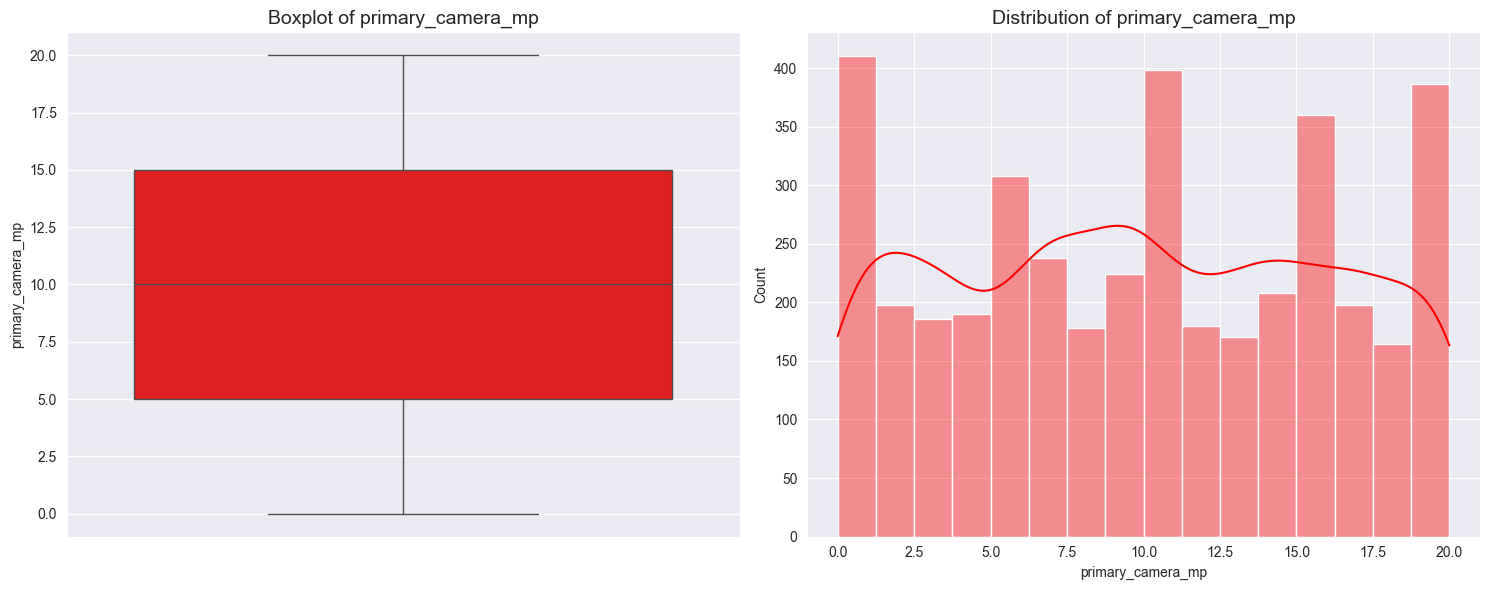

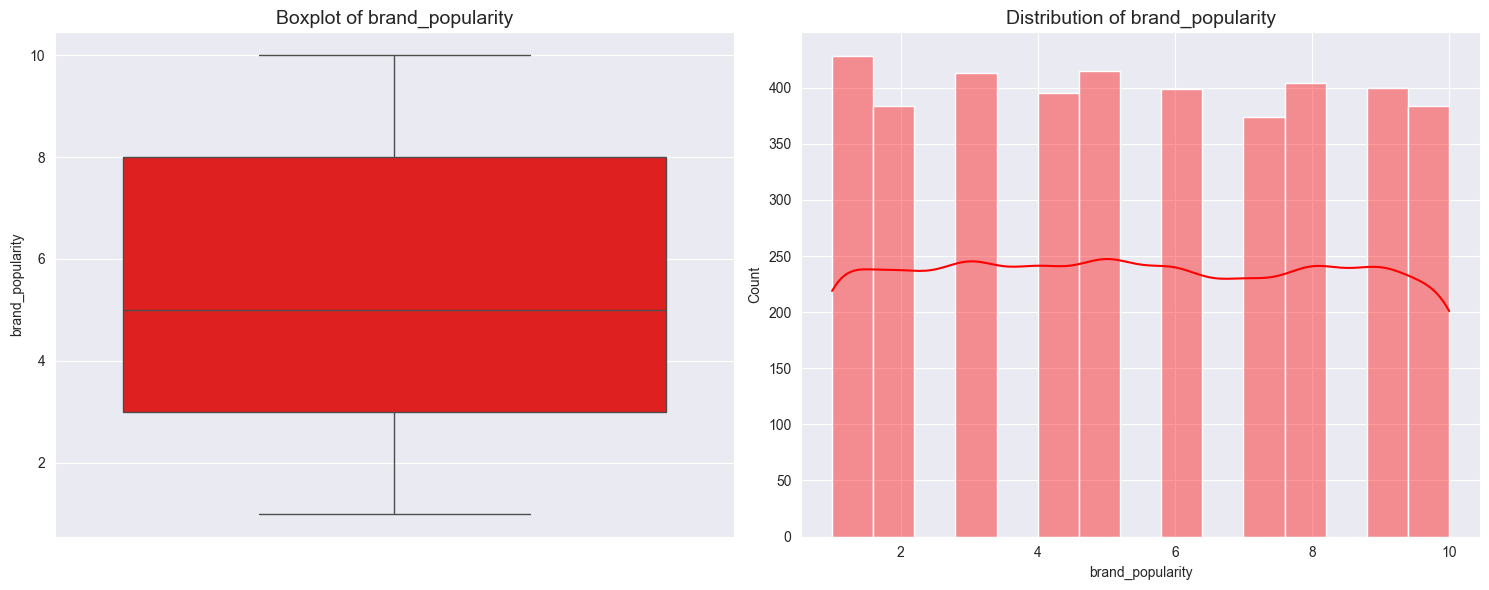

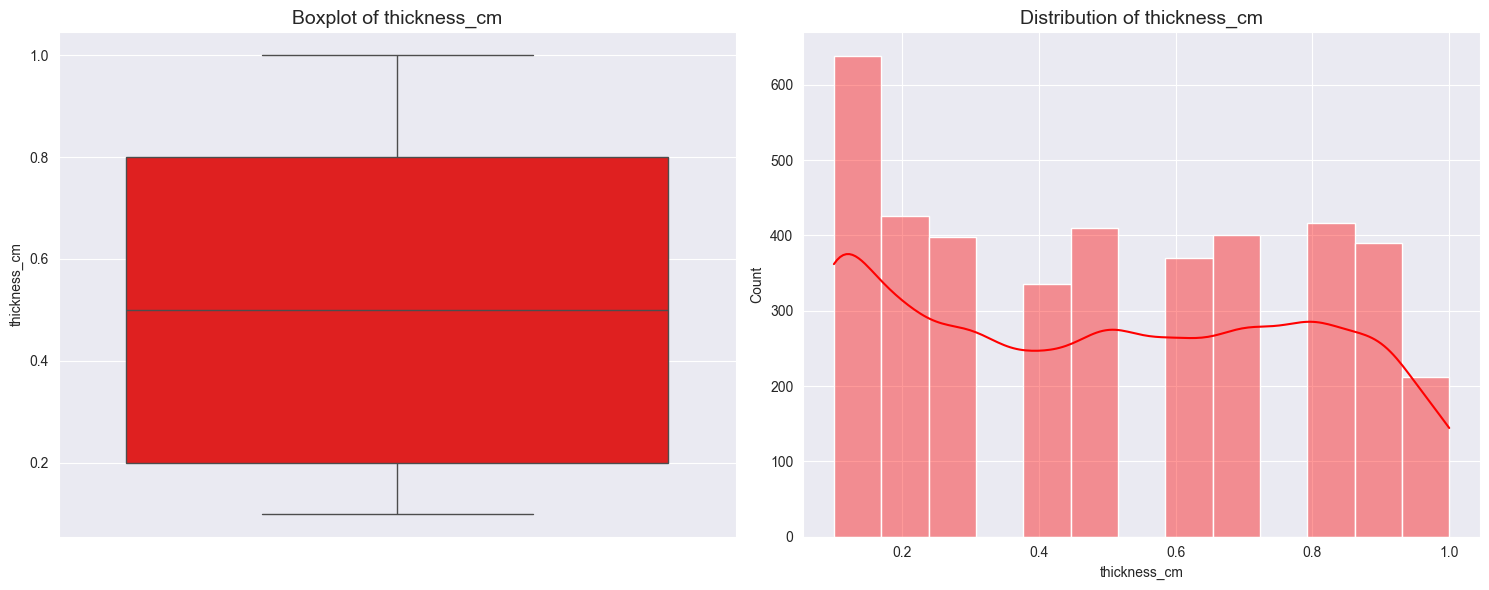

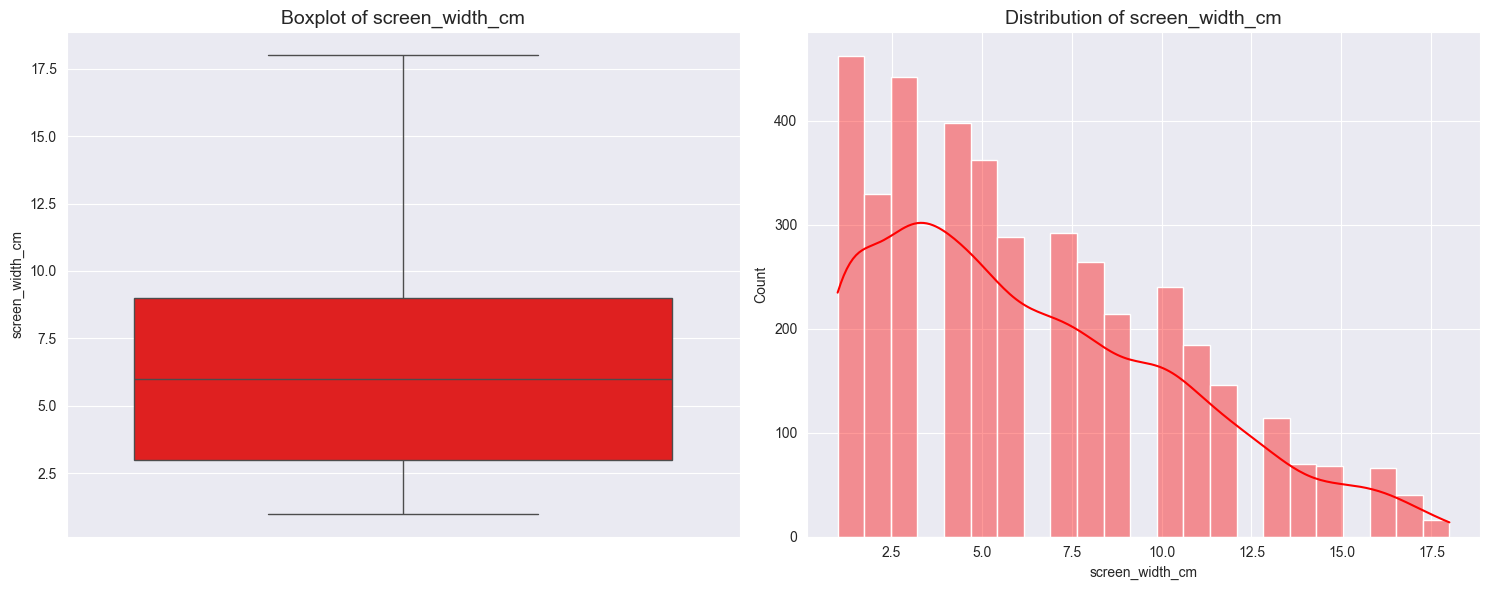

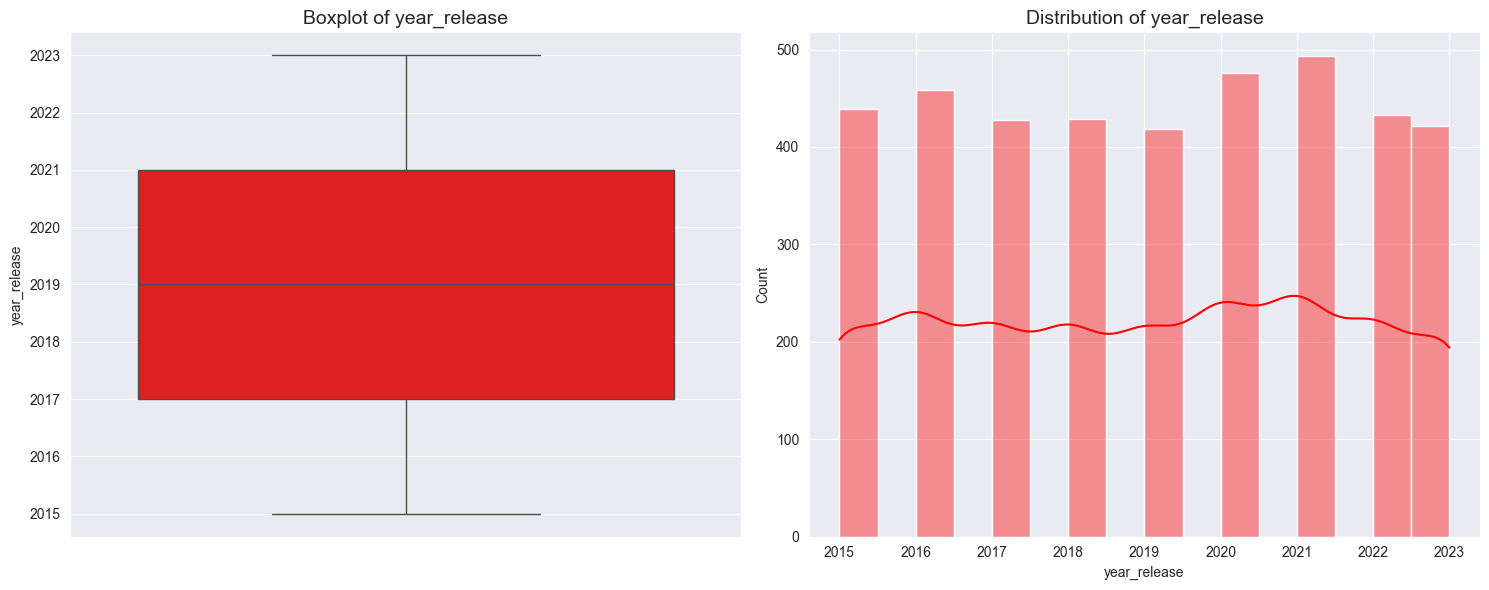

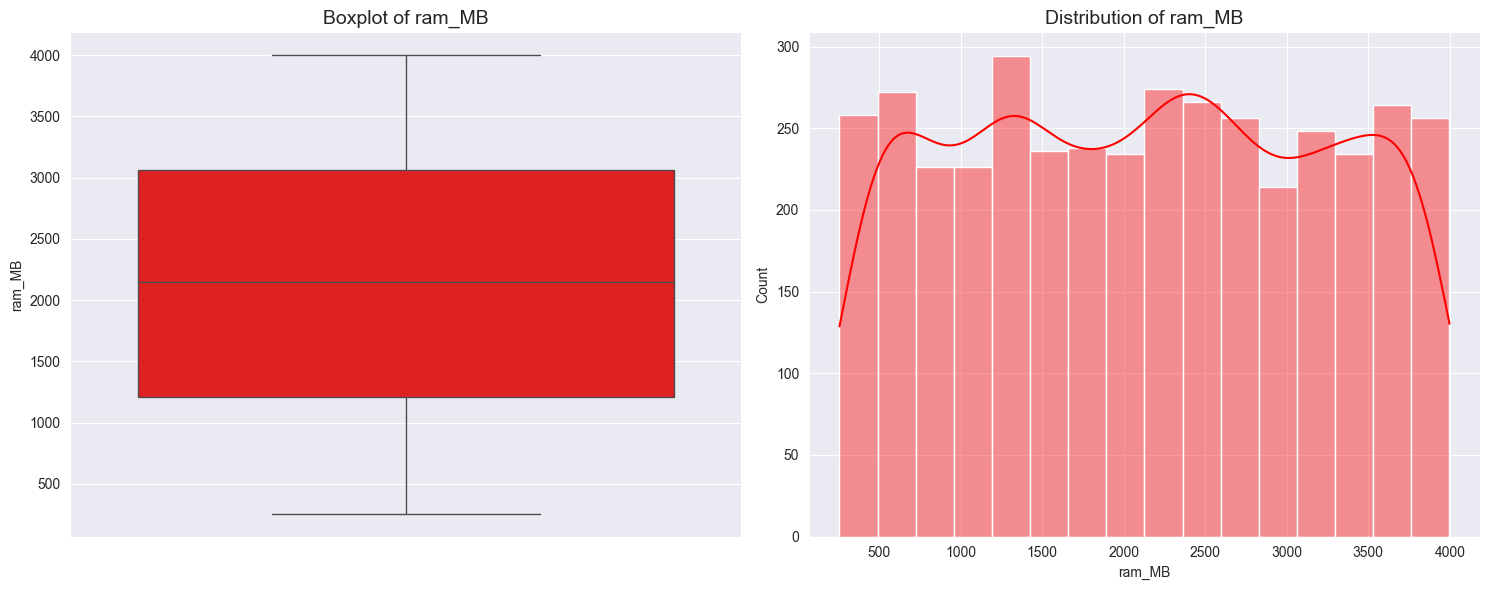

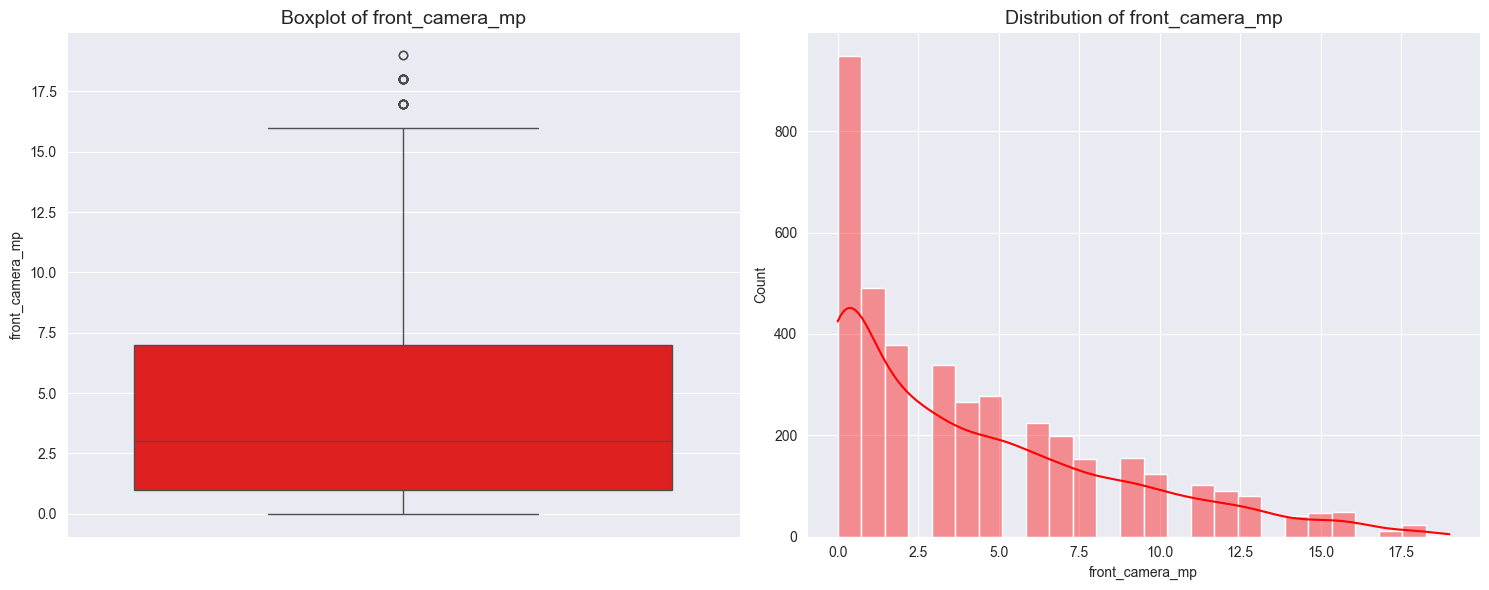

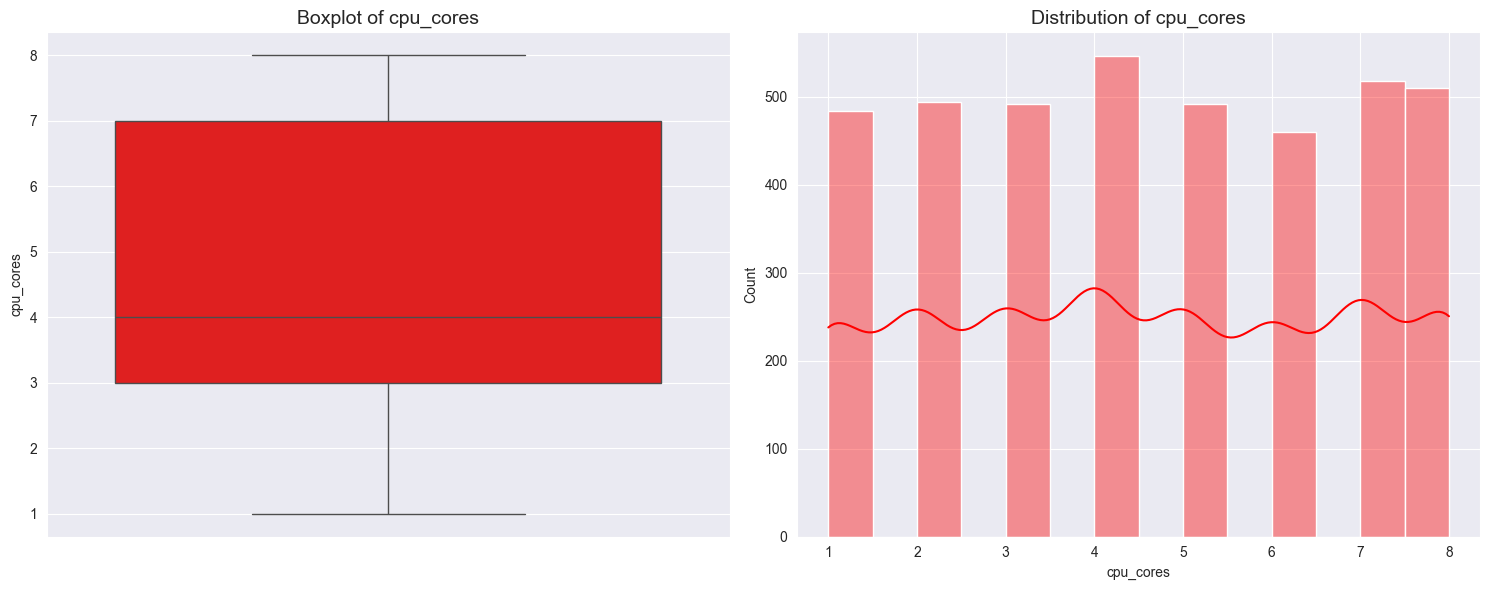

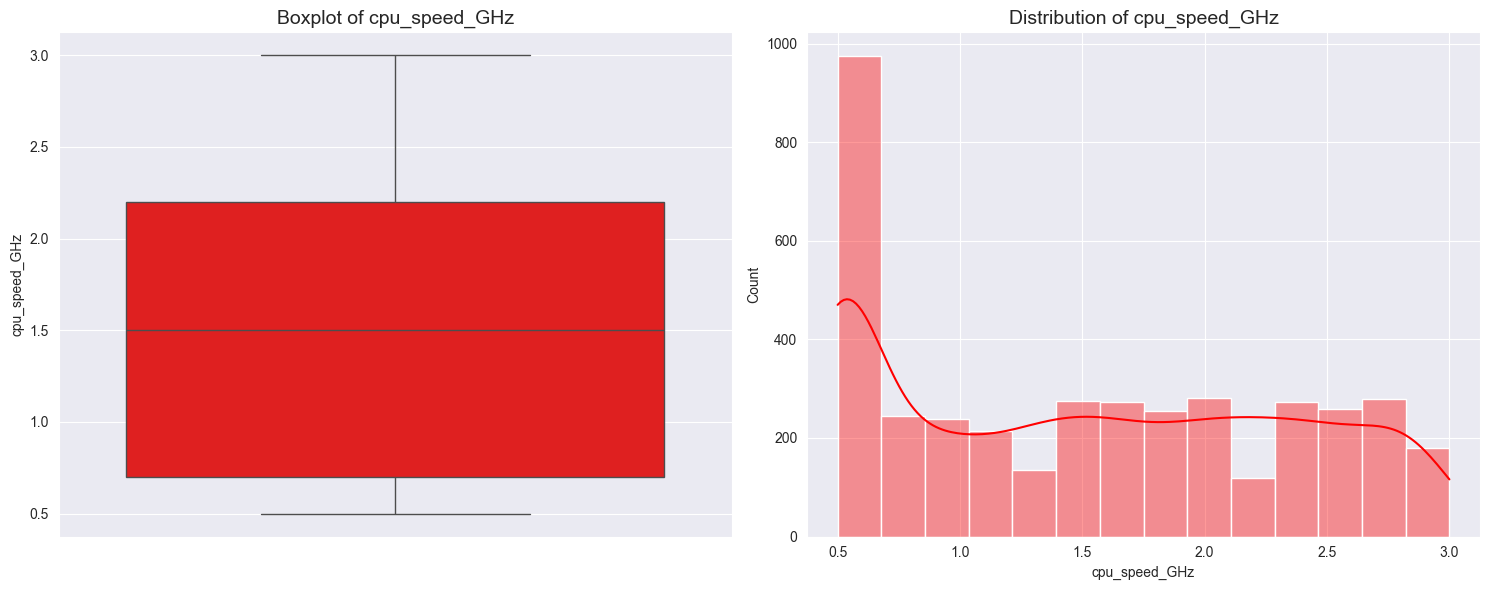

In [228]:
#Let's Check the distribution of numerical columns and Outliers.

numeric_col = ['battery_mAh', 'screen_height_cm', 'screen_width_px', 'weight_g',
       'internal_memory_GB', 'color_variety', 'screen_height_px', 'talk_time_hr', 'primary_camera_mp', 'brand_popularity',
       'thickness_cm', 'screen_width_cm', 'year_release', 'ram_MB',
       'front_camera_mp', 'cpu_cores',
       'cpu_speed_GHz']

for var in numeric_col:
    plt.figure(figsize=(15,6))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_mobile_data[var], color='red')
    plt.title(f'Boxplot of {var}', fontsize=14)
    plt.ylabel(var)

    # Histogram + KDE line
    plt.subplot(1, 2, 2)
    sns.histplot(df_mobile_data[var], kde=True, color='red', alpha=0.4, edgecolor=None)
    plt.title(f'Distribution of {var}', fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()


    #Data is well distributed
    #screen_height_px and front_camera_mp have any outliers


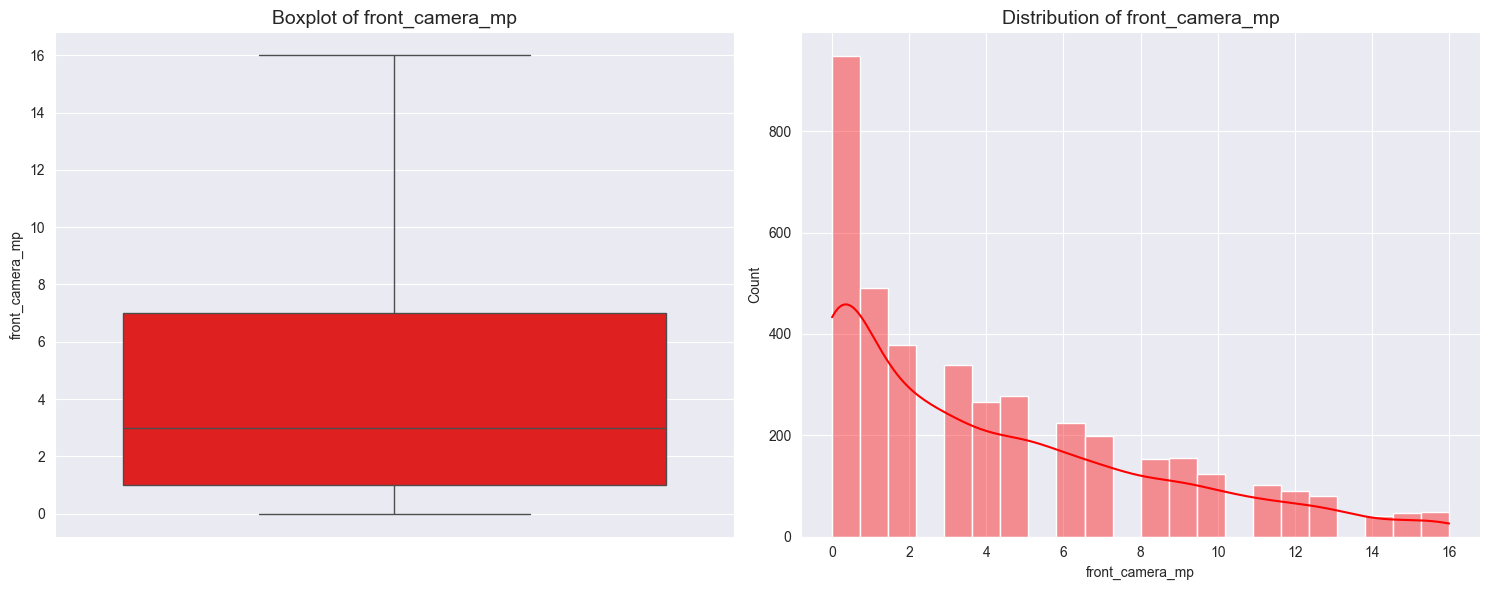

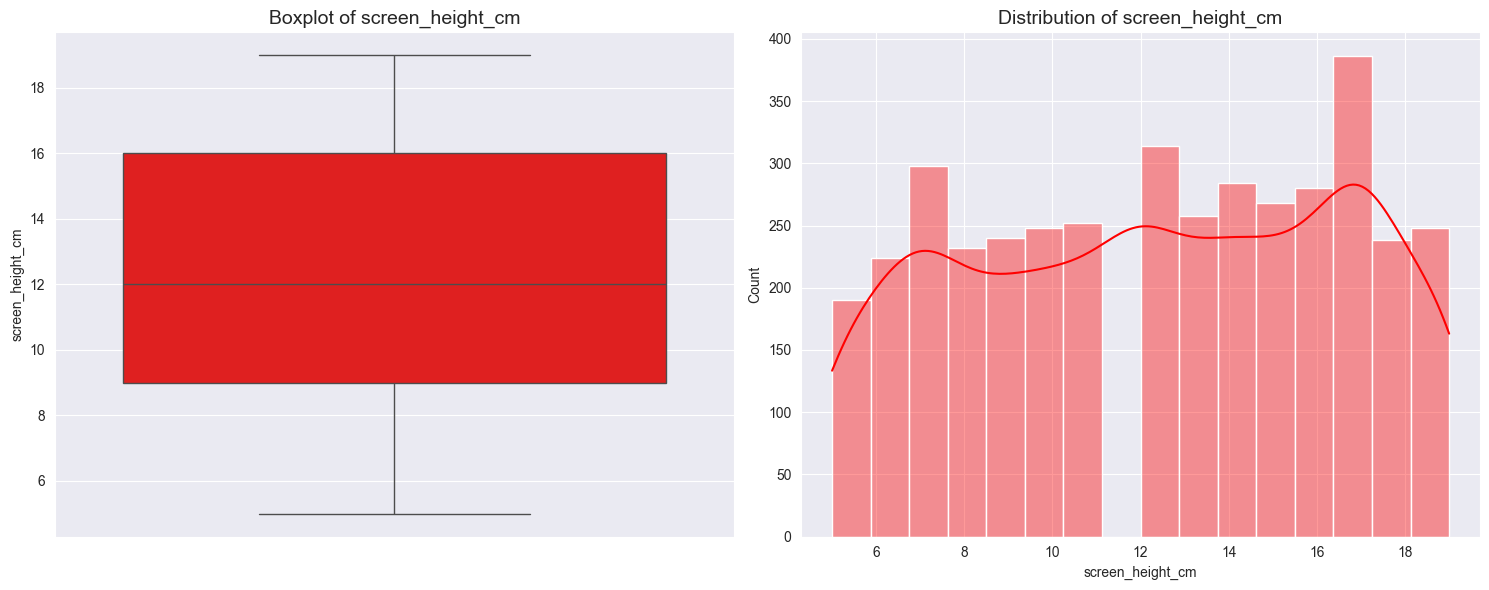

In [229]:
Q1 = df_mobile_data['screen_height_px'].quantile(0.25)
Q3 = df_mobile_data['screen_height_px'].quantile(0.991)
IQR = Q3-Q1

df_mobile_data = df_mobile_data[(df_mobile_data['screen_height_cm'] <= Q3)]

Q1 = df_mobile_data['front_camera_mp'].quantile(0.25)
Q3 = df_mobile_data['front_camera_mp'].quantile(0.991)
IQR = Q3-Q1

df_mobile_data = df_mobile_data[(df_mobile_data['front_camera_mp'] <= Q3)]


#Visualising whether outliers are removed or not
for var in ['front_camera_mp', 'screen_height_cm']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_mobile_data[var], color='red')
    plt.title(f'Boxplot of {var}', fontsize=14)
    plt.ylabel(var)

    # Histogram + KDE line
    plt.subplot(1, 2, 2)
    sns.histplot(df_mobile_data[var], kde=True, color='red', alpha=0.4, edgecolor=None)
    plt.title(f'Distribution of {var}', fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()


In [230]:
df_mobile_data.shape

(3960, 24)

<Axes: >

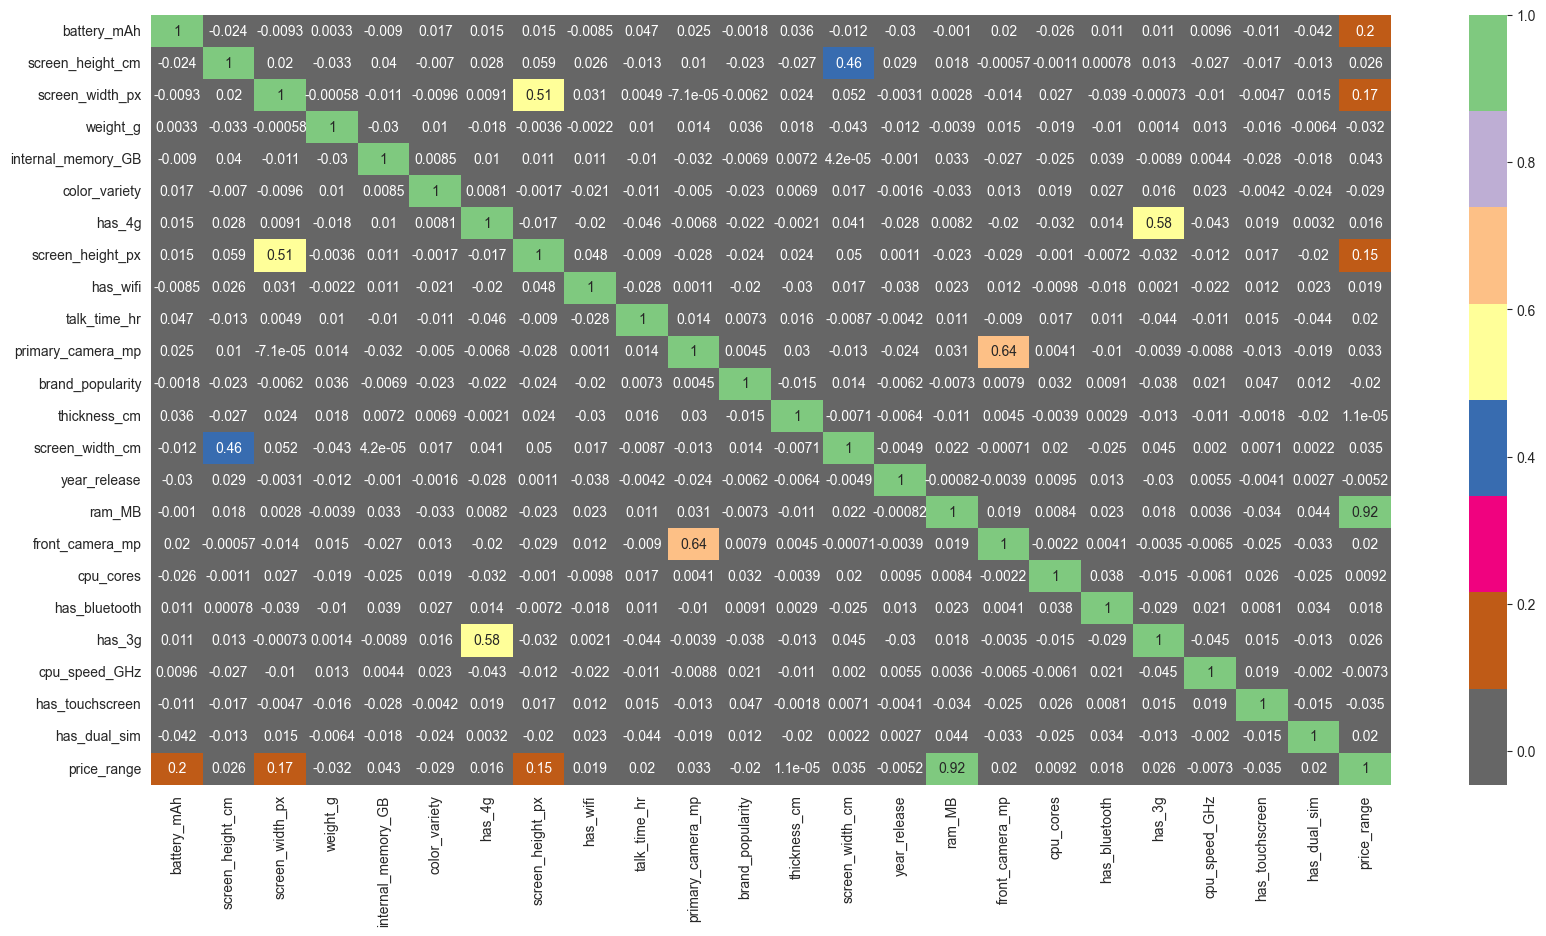

In [231]:
#Correlation of target variable(Output) with other Features

corr= df_mobile_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)

In [290]:
# Separating X variables(independent variables) and Y(dependent variable) variable.
X = df_mobile_data.drop('price_range', axis=1)
y = df_mobile_data['price_range']

print(f"Feature shape: {X.shape}")
print(f"Target shape: {y.shape}")

Feature shape: (3960, 23)
Target shape: (3960,)


In [291]:
#Train-80%, Test-20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (3168, 23)
Test set shape: (792, 23)


In [292]:
#Data Normalization
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Mean :", X_train_scaled.mean().round(6))
print("Std :", X_train_scaled.std().round(6))

Mean : battery_mAh           0.0
screen_height_cm      0.0
screen_width_px      -0.0
weight_g             -0.0
internal_memory_GB    0.0
color_variety         0.0
has_4g                0.0
screen_height_px      0.0
has_wifi             -0.0
talk_time_hr         -0.0
primary_camera_mp     0.0
brand_popularity      0.0
thickness_cm          0.0
screen_width_cm      -0.0
year_release          0.0
ram_MB               -0.0
front_camera_mp      -0.0
cpu_cores             0.0
has_bluetooth         0.0
has_3g                0.0
cpu_speed_GHz        -0.0
has_touchscreen      -0.0
has_dual_sim         -0.0
dtype: float64
Std : battery_mAh           1.000158
screen_height_cm      1.000158
screen_width_px       1.000158
weight_g              1.000158
internal_memory_GB    1.000158
color_variety         1.000158
has_4g                1.000158
screen_height_px      1.000158
has_wifi              1.000158
talk_time_hr          1.000158
primary_camera_mp     1.000158
brand_popularity      1.000158
th

In [293]:
#Defining a fucnction for plotting roc curve
def plot_Auc_roc(y_test,pred_prob):
  '''It will take y_test and y predicted probabilities
  as input and will plot the roc curve.'''

  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 4

  for i in range(n_class):
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

  # plotting
  plt.figure(figsize=(12,8))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= ((f'Class 0(Low cost) vs Rest, AUC= {round(auc(fpr[0],tpr[0]),4)}')))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=((f'Class 1(Medium cost) vs Rest, AUC= {round(auc(fpr[1],tpr[1]),4)}')))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=((f'Class 2(High cost) vs Rest, AUC= {round(auc(fpr[2],tpr[2]),4)}')))
  plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=((f'Class 3(Very High cost) vs Rest, AUC= {round(auc(fpr[3],tpr[3]),4)}')))
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC',dpi=300);

In [294]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# creating an object of the classifier.
knn = KNeighborsClassifier()

# fitting/training the model.
knn.fit(X_train_scaled, y_train)



,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [295]:
# predicting the y values of train set and test set
y_train_pred=knn.predict(X_train_scaled)
y_pred = knn.predict(X_test_scaled)

#Checking the accuracy score of train set
accuracy_score(y_train, y_train_pred)

0.8036616161616161

In [296]:
# Checking the accuracy score of test set.
accuracy_score(y_test, y_pred)

0.6275252525252525

In [297]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[155,  33,   9,   1],
       [ 66,  94,  32,   6],
       [ 16,  53, 115,  15],
       [  4,  16,  44, 133]])

In [298]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86       794
         1.0       0.73      0.77      0.75       790
         2.0       0.77      0.74      0.76       795
         3.0       0.92      0.79      0.85       789

    accuracy                           0.80      3168
   macro avg       0.81      0.80      0.80      3168
weighted avg       0.81      0.80      0.80      3168



In [299]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.78      0.71       198
         1.0       0.48      0.47      0.48       198
         2.0       0.57      0.58      0.58       199
         3.0       0.86      0.68      0.76       197

    accuracy                           0.63       792
   macro avg       0.64      0.63      0.63       792
weighted avg       0.64      0.63      0.63       792



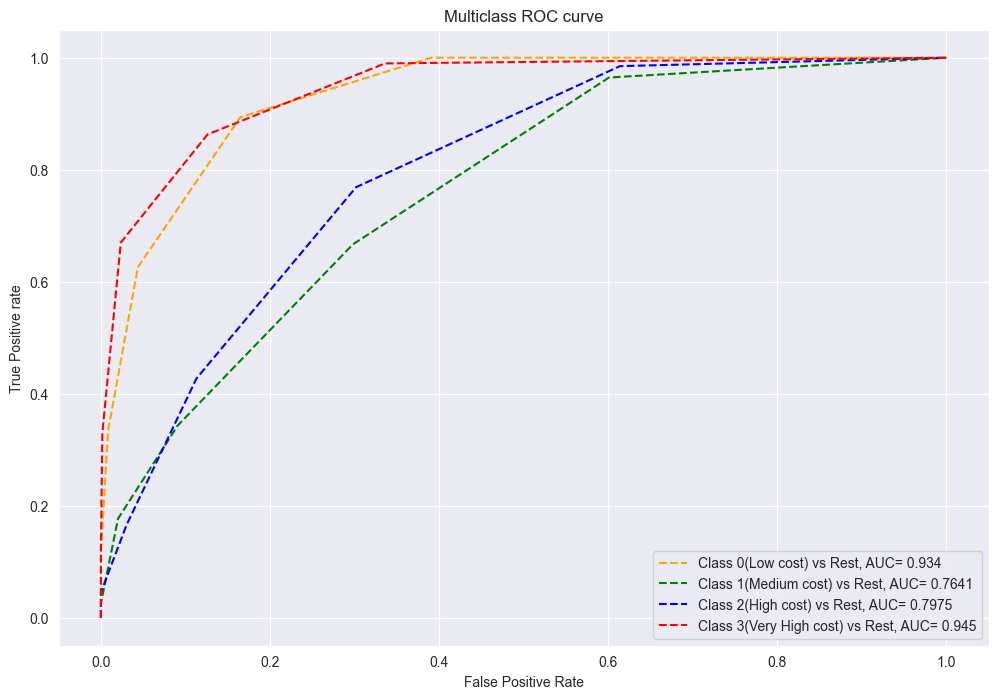

In [300]:
#Plot AUC ROC curve
pred_prob = knn.predict_proba(X_test_scaled)
plot_Auc_roc(y_test, pred_prob)

In [301]:
# parameter grid values.
grid_values = {'n_neighbors':list(range(1, 31))}

In [302]:
# applyong GridSearchCv with above grid values and cv=5
knn_tune=GridSearchCV(knn,cv=5,scoring='accuracy',verbose=3,param_grid=grid_values)
knn_tune.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.756 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.767 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.762 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.798 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.779 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.579 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.599 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.591 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.605 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.618 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.571 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,1


In [303]:
# getting thge best parameters
knn_tune.best_params_

{'n_neighbors': 1}

In [304]:
# fitting the data with best parameters
knn_optimal=KNeighborsClassifier(n_neighbors=1)
knn_optimal.fit(X_train_scaled,y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [305]:
# predicting y values of train and test set.
y_train_pred=knn_optimal.predict(X_train_scaled)
y_pred=knn_optimal.predict(X_test_scaled)

In [308]:
#checking the accuracy score of train set.
accuracy_score(y_train,y_train_pred)

1.0

In [309]:
# checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.8611111111111112

In [288]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[179,   9,  10,   0],
       [ 16, 159,  19,   4],
       [  3,  14, 165,  17],
       [  1,   5,  12, 179]])

In [289]:
# printig tye classification report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       794
         1.0       1.00      1.00      1.00       790
         2.0       1.00      1.00      1.00       795
         3.0       1.00      1.00      1.00       789

    accuracy                           1.00      3168
   macro avg       1.00      1.00      1.00      3168
weighted avg       1.00      1.00      1.00      3168



In [268]:

# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       198
         1.0       0.85      0.80      0.83       198
         2.0       0.80      0.83      0.81       199
         3.0       0.90      0.91      0.90       197

    accuracy                           0.86       792
   macro avg       0.86      0.86      0.86       792
weighted avg       0.86      0.86      0.86       792



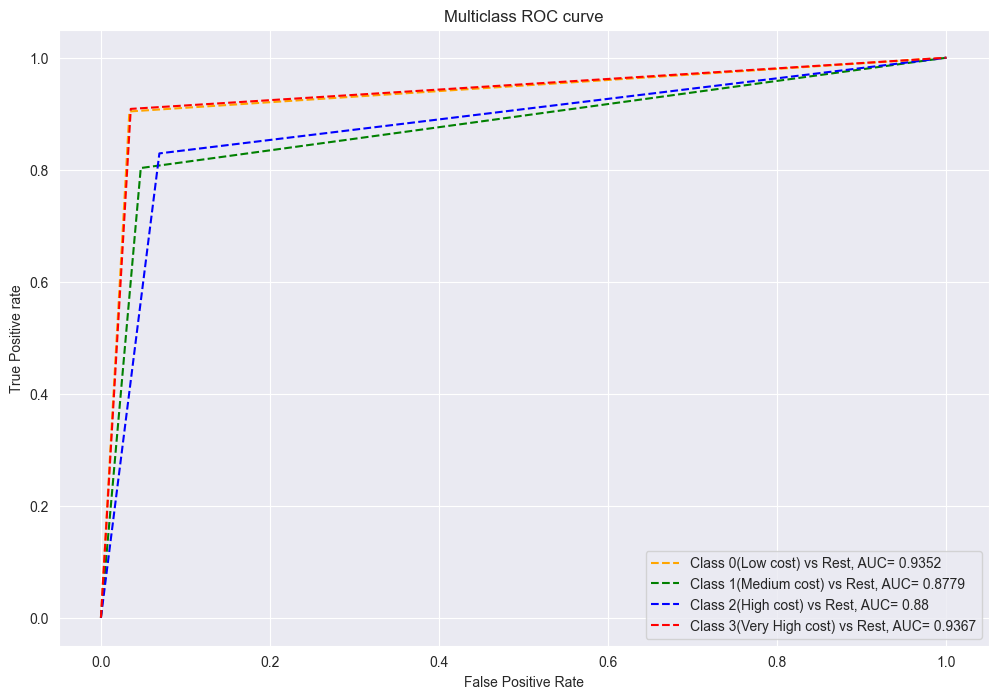

In [310]:
# Plot AUC ROC curve.
pred_prob = knn_optimal.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

In [326]:
from sklearn.svm import SVC

svc = SVC(random_state=101)
svc.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [330]:
# predicting the y value of train set and test set
y_train_pred=svc.predict(X_train_scaled)
y_pred=svc.predict(X_test_scaled)

In [331]:
# Accuracy score for train set
accuracy_score(y_train,y_train_pred)

0.9952651515151515

In [332]:
# Accuracy score for test set.
accuracy_score(y_test,y_pred)

0.9583333333333334

In [323]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[193,   5,   0,   0],
       [  8, 182,   8,   0],
       [  0,   4, 191,   4],
       [  0,   0,   4, 193]])

In [324]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       794
         1.0       0.99      0.99      0.99       790
         2.0       0.99      0.99      0.99       795
         3.0       1.00      1.00      1.00       789

    accuracy                           1.00      3168
   macro avg       1.00      1.00      1.00      3168
weighted avg       1.00      1.00      1.00      3168



In [325]:
#printing the classifiaction report of train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       198
         1.0       0.95      0.92      0.94       198
         2.0       0.94      0.96      0.95       199
         3.0       0.98      0.98      0.98       197

    accuracy                           0.96       792
   macro avg       0.96      0.96      0.96       792
weighted avg       0.96      0.96      0.96       792



In [333]:
from sklearn.svm import SVC
svm_model = SVC(
    kernel='rbf',        # Radial Basis Function kernel
    C=1.0,              # Regularization parameter
    gamma='scale',      # Kernel coefficient
    random_state=42,
    probability=True    # Enable probability estimates
)
svm_model.fit(X_train_scaled, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [335]:
SVC(probability=True, random_state=42)

y_pred_svm_train = svm_model.predict(X_train_scaled)
y_pred_svm_test = svm_model.predict(X_test_scaled)

svm_train_acc = accuracy_score(y_train, y_pred_svm_train)
svm_test_acc = accuracy_score(y_test, y_pred_svm_test)
svm_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)

print(f"Training Accuracy: {svm_train_acc:.4f} ({svm_train_acc:.1%})")
print(f"Testing Accuracy: {svm_test_acc:.4f} ({svm_test_acc:.1%})")
print(f"Cross-Validation: {svm_cv_scores.mean():.4f} ± {svm_cv_scores.std():.4f}")


Training Accuracy: 0.9953 (99.5%)
Testing Accuracy: 0.9583 (95.8%)
Cross-Validation: 0.9261 ± 0.0109


In [336]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Khởi tạo mô hình KNN
knn_model = KNeighborsClassifier(
    n_neighbors=5,     # số lượng láng giềng gần nhất (có thể tune)
    metric='minkowski',# công thức khoảng cách (mặc định là Euclidean)
    weights='uniform'  # tất cả hàng xóm có trọng số bằng nhau
)

# Huấn luyện mô hình
knn_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập train và test
y_pred_knn_train = knn_model.predict(X_train_scaled)
y_pred_knn_test = knn_model.predict(X_test_scaled)

# Độ chính xác
knn_train_acc = accuracy_score(y_train, y_pred_knn_train)
knn_test_acc = accuracy_score(y_test, y_pred_knn_test)

# Cross Validation
knn_cv_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)

# In kết quả
print(f"Training Accuracy: {knn_train_acc:.4f} ({knn_train_acc:.1%})")
print(f"Testing Accuracy: {knn_test_acc:.4f} ({knn_test_acc:.1%})")
print(f"Cross-Validation: {knn_cv_scores.mean():.4f} ± {knn_cv_scores.std():.4f}")


Training Accuracy: 0.8037 (80.4%)
Testing Accuracy: 0.6275 (62.8%)
Cross-Validation: 0.5928 ± 0.0212


In [337]:
comparison_data = {
    'Model': ['KNN', 'SVM'],

    'Training Accuracy': [
        f'{knn_train_acc:.4f} ({knn_train_acc:.1%})',
        f'{svm_train_acc:.4f} ({svm_train_acc:.1%})'
    ],

    'Testing Accuracy': [
        f'{knn_test_acc:.4f} ({knn_test_acc:.1%})',
        f'{svm_test_acc:.4f} ({svm_test_acc:.1%})'
    ]
}

df_comparison = pd.DataFrame(comparison_data)
print(df_comparison.to_string(index=False))


Model Training Accuracy Testing Accuracy
  KNN    0.8037 (80.4%)   0.6275 (62.8%)
  SVM    0.9953 (99.5%)   0.9583 (95.8%)


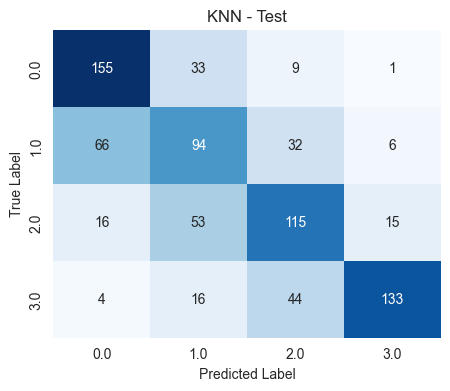

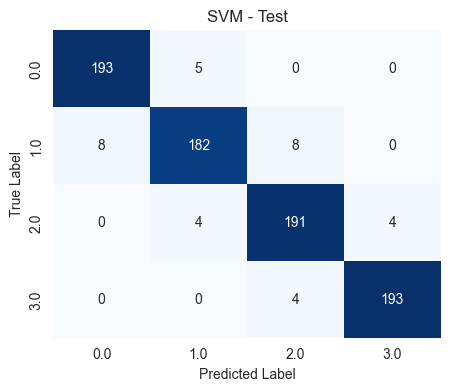

In [339]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    labels = np.unique(y_true)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# =============================
#Draw Confusion Matrix for KNN
plot_conf_matrix(y_test, y_pred_knn_test, "KNN - Test")

#Draw Confusion Matrix for SVM
plot_conf_matrix(y_test, y_pred_svm_test, "SVM - Test")
